# Proyecto 1 :  Minería de Texto para Turismo

## Procesamiento del Lenguage Natural

### Esteban Reyes Saldaña

# Lectura de Datos

In [32]:
import pandas as pd
import numpy as np

from tabulate import tabulate
import matplotlib.pyplot as plt

import nltk
from nltk.tokenize import TweetTokenizer
tk = TweetTokenizer()

In [33]:
filename = '/content/drive/MyDrive/CIMAT/Segundo_Semestre/Lenguaje Natural/Proyecto1/Opiniones Tripadvisor_nlp.xlsx'
dfs      = pd.read_excel(filename, sheet_name = None)

## Tablas de DataFrame

In [34]:
# Nombre de tablas
for i, name in enumerate(dfs.keys()) :
  print('-' * 40)
  print('Tabla ', i, ':', name)

----------------------------------------
Tabla  0 : Basilica Colegiata 560
----------------------------------------
Tabla  1 : Mercado Hidalgo 600
----------------------------------------
Tabla  2 : Casa de Diego Rivera 698
----------------------------------------
Tabla  3 : Universidad de Guanajuato 900
----------------------------------------
Tabla  4 : Alhóndiga 930
----------------------------------------
Tabla  5 : Teatro Juárez 1,010
----------------------------------------
Tabla  6 : Jardín de la Unión 1,134
----------------------------------------
Tabla  7 : Callejón del Beso 1,360
----------------------------------------
Tabla  8 : Monumento Pípila 1,620
----------------------------------------
Tabla  9 : Museo de las Momias 1,650


## Categorías en Tablas

In [35]:
# Nombre de categorías
for column in dfs['Basilica Colegiata 560'].keys() :
  print('Column name :', column)

Column name : Género
Column name : Edad
Column name : Nacional ó Internacional
Column name : Calificación
Column name : Escala
Column name : Número de aportaciones
Column name : Título de la opinión
Column name : Opinión
Column name : País
Column name : Idioma
Column name : Dispositivo
Column name : Fecha


# Parte 1

Construya estadísticas básicas respecto a la opinión de cada lugar turistico. Considere scores de **4 a 5** como positivos, calificaciones de **3** como neutros y las de **2 a 1** como negativos.

## (a) Promedios de calificación por lugar, y desviaciones estándar en los scores.


In [36]:
def scores(table, column = 'Escala') :
  scores_ = np.array(table[column], dtype = np.float32)

  return np.mean(scores_), np.std(scores_)

In [37]:
# Obtenida de https://stackoverflow.com/questions/28931224/adding-value-labels-on-a-matplotlib-bar-chart
def plot_scores (scores_array, labels, tittle = 'Promedio Obtenidos', max_value = 5) :
  # Datos
  freq_series = pd.Series(scores_array)
  y_labels    = labels

  # Plot the figure.
  plt.figure(figsize=(6, 6))
  ax = freq_series.plot(kind='barh')
  ax.set_title(tittle)
  ax.set_xlabel('Frecuencia')
  ax.set_yticklabels(y_labels)
  ax.set_xlim(0, max_value) # expand xlim to make labels easier to read

  rects = ax.patches

  # For each bar: Place a label
  for rect in rects:
    # Get X and Y placement of label from rect.
    x_value = rect.get_width()
    y_value = rect.get_y() + rect.get_height() / 2

    # Number of points between bar and label. Change to your liking.
    space = 5
    # Vertical alignment for positive values
    ha = 'left'

    # If value of bar is negative: Place label left of bar
    if x_value < 0:
        # Invert space to place label to the left
        space *= -1
        # Horizontally align label at right
        ha = 'right'

    # Use X value as label and format number with one decimal place
    label = "{:.1f}".format(x_value)

    # Create annotation
    plt.annotate(
        label,                      # Use `label` as label
        (x_value, y_value),         # Place label at end of the bar
        xytext=(space, 0),          # Horizontally shift label by `space`
        textcoords="offset points", # Interpret `xytext` as offset in points
        va='center',                # Vertically center label
        ha=ha)                      # Horizontally align label differently for
                                    # positive and negative values.

In [38]:
# Nombre de tablas
scores_ = []
for i, name in enumerate(dfs.keys()) :
  prom, sd = scores(dfs[name], column = 'Escala')
  lugar = [name, prom, sd]
  scores_.append(lugar)

scores_ = np.array(scores_)
print(tabulate(scores_, headers = ['Nombre', 'Promedio', 'Desviación']))

Nombre                           Promedio    Desviación
-----------------------------  ----------  ------------
Basilica Colegiata 560            4.5          0.668153
Mercado Hidalgo 600               3.94833      0.949911
Casa de Diego Rivera 698          4.24355      0.803463
Universidad de Guanajuato 900     4.60333      0.612273
Alhóndiga 930                     4.45484      0.74531
Teatro Juárez 1,010               4.70297      0.517889
Jardín de la Unión 1,134          4.59171      0.607102
Callejón del Beso 1,360           3.99559      0.97089
Monumento Pípila 1,620            4.37778      0.767713
Museo de las Momias 1,650         3.67515      1.13615


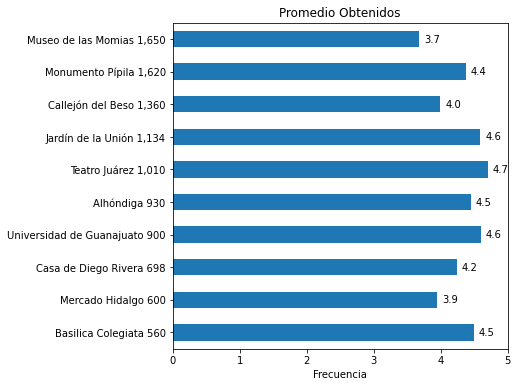

In [39]:
# Gráfica de Promedios
means       = np.array(scores_[:,1], dtype = np.float32)
labels      = scores_[:,0]

plot_scores(means, labels)

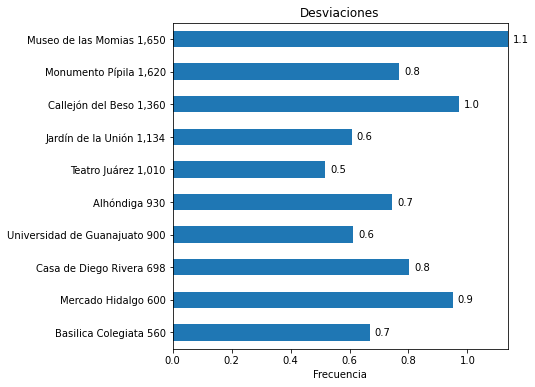

In [40]:
# Gráfica de Desviaciones
sd       = np.array(scores_[:,2], dtype = np.float32)
labels      = scores_[:,0]

plot_scores(sd, labels, tittle = 'Desviaciones', max_value = max(sd))

## (b) Basado en palabras: longitud promedio de opiniones y desviacones estándar.

In [41]:
def get_opinion_len(text) :
  opinions = []
  for opinion in text :
    tmp = tk.tokenize(opinion) 
    opinions.append(len(tmp))

  return np.mean(opinions), np.std(opinions)

In [42]:
opinions_info = []

for place in dfs.keys() :
  text = np.array(dfs[place]['Opinión'])
  mean, sd = get_opinion_len(text)

  opinions_info.append([place, mean, sd])

scores_ = np.array(opinions_info)
print(tabulate(scores_, headers = ['Nombre', 'Longitud Promedio', 'Desviación']))

Nombre                           Longitud Promedio    Desviación
-----------------------------  -------------------  ------------
Basilica Colegiata 560                     46.3518       32.5521
Mercado Hidalgo 600                        53.6817       38.0524
Casa de Diego Rivera 698                   56.7736       33.5452
Universidad de Guanajuato 900              41.49         22.2485
Alhóndiga 930                              53.5903       37.3643
Teatro Juárez 1,010                        48.4683       29.9257
Jardín de la Unión 1,134                   50.8448       41.7183
Callejón del Beso 1,360                    52.4537       36.6039
Monumento Pípila 1,620                     54.8          40.1487
Museo de las Momias 1,650                  67.1485       51.9814


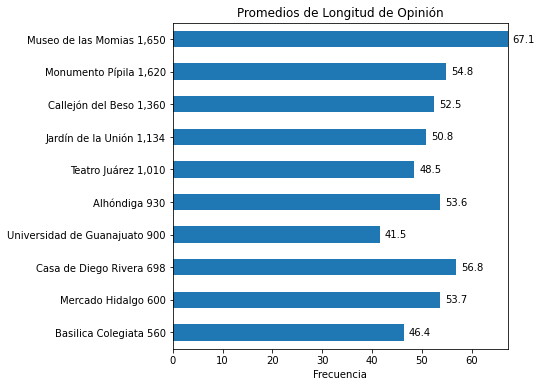

In [43]:
# Gráfica de Promedios
means       = np.array(scores_[:,1], dtype = np.float32)
labels      = scores_[:,0]

plot_scores(means, labels, tittle = 'Promedios de Longitud de Opinión', max_value = max(means))

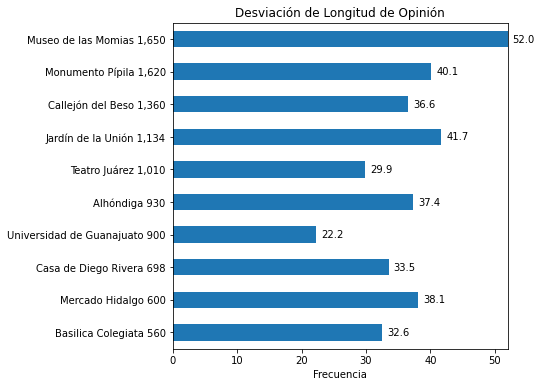

In [44]:
# Gráfica de Promedios
sd       = np.array(scores_[:,2], dtype = np.float32)
labels      = scores_[:,0]

plot_scores(sd, labels, tittle = 'Desviación de Longitud de Opinión', max_value = max(sd))

## (c) Histogramas de edades de opiniones por lugar.

In [45]:
def scores(table, column = 'Escala') :
  scores_ = table[column]
  return np.mean(scores_), np.std(scores_)

In [46]:
# Nombre de tablas
scores_ = []
for i, name in enumerate(dfs.keys()) :
  prom, sd = scores(dfs[name], column = 'Edad')
  lugar = [name, prom, sd]
  scores_.append(lugar)

scores_ = np.array(scores_)
print(tabulate(scores_, headers = ['Nombre', 'Promedio', 'Desviación']))

Nombre                           Promedio    Desviación
-----------------------------  ----------  ------------
Basilica Colegiata 560            41.8743       14.8223
Mercado Hidalgo 600               40.6936       15.0733
Casa de Diego Rivera 698          44.3481       15.1131
Universidad de Guanajuato 900     39.3117       13.9211
Alhóndiga 930                     40.7066       13.3363
Teatro Juárez 1,010               41.7538       13.8062
Jardín de la Unión 1,134          41.3858       14.8825
Callejón del Beso 1,360           38.8262       13.3309
Monumento Pípila 1,620            38.4365       13.0453
Museo de las Momias 1,650         38.9647       12.882


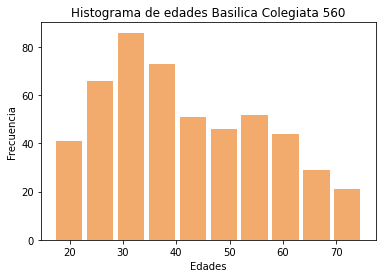

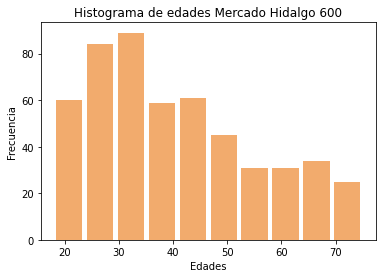

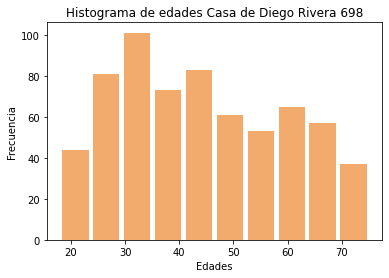

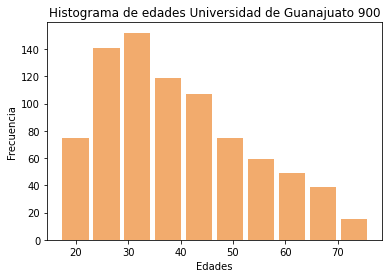

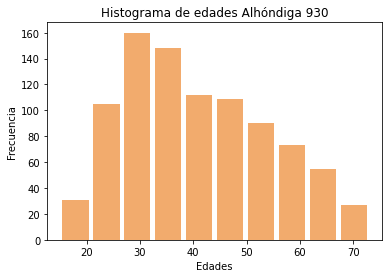

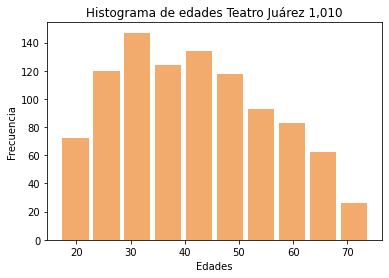

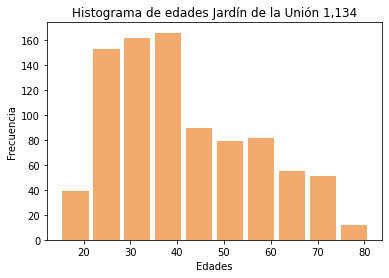

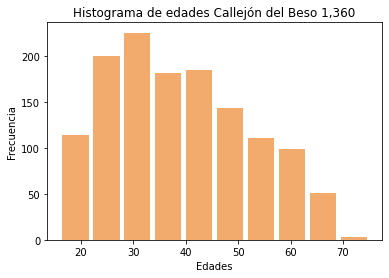

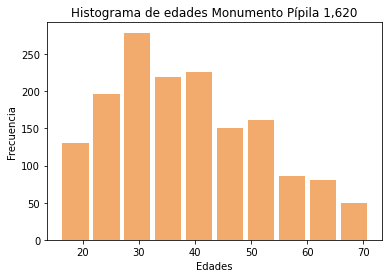

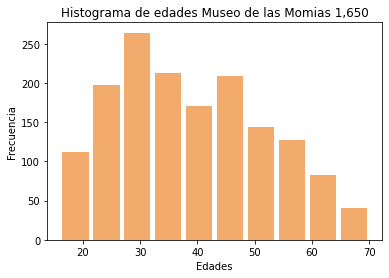

In [47]:
# Obtengo nombres de lugares
for place in dfs.keys() :
  # Obtengo array de edades
  ages = dfs[place]['Edad']
  
  plt.hist(x = ages, bins = 10, color = '#F2AB6D', rwidth = 0.85,)
  plt.title('Histograma de edades ' + place)
  plt.xlabel('Edades')
  plt.ylabel('Frecuencia')

  plt.show()

## (d) Histograma de tipo de visitantes (nacional o internacional) por lugar.


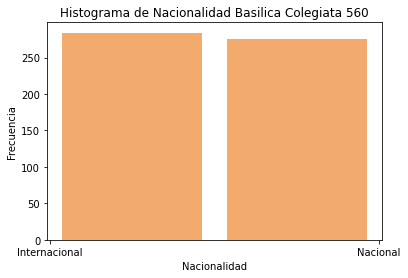

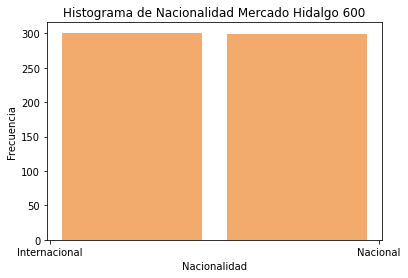

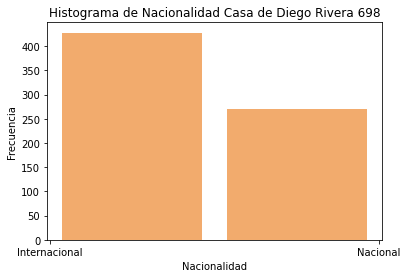

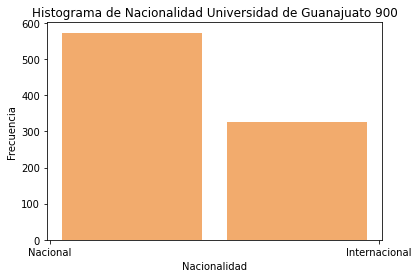

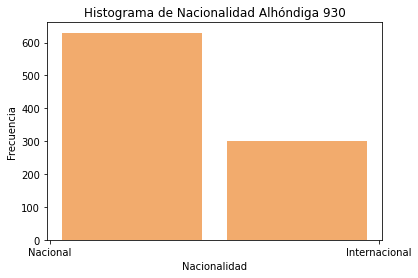

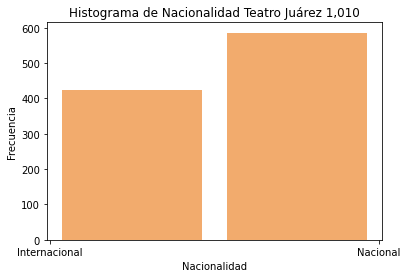

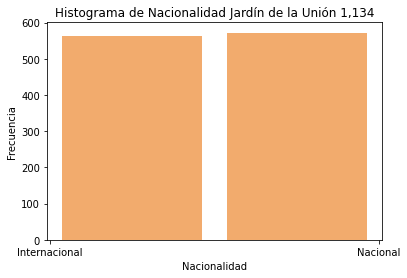

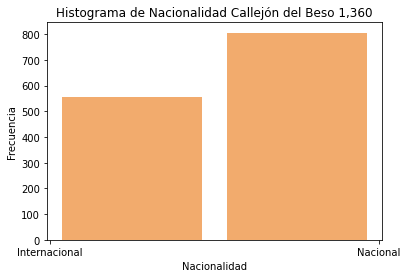

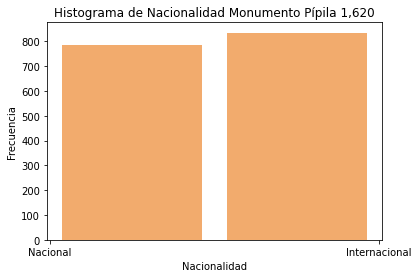

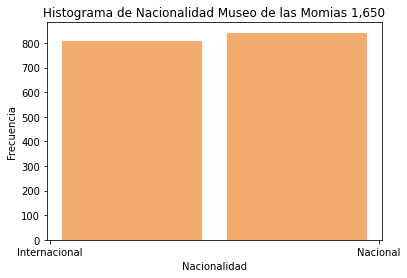

In [48]:
# Obtengo nombres de lugares
for place in dfs.keys() :
  # Obtengo array de edades
  nacionality = dfs[place]['Nacional ó Internacional']
  
  plt.hist(x = nacionality, bins = 2, color = '#F2AB6D', rwidth = 0.85)
  plt.title('Histograma de Nacionalidad ' + place)
  plt.xlabel('Nacionalidad')
  plt.ylabel('Frecuencia')

  plt.show()

## (e) Sugiere dos más interesantes para ti.

### Género

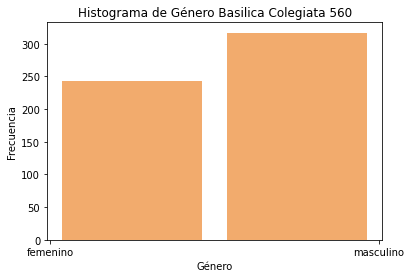

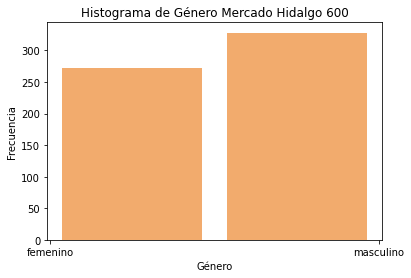

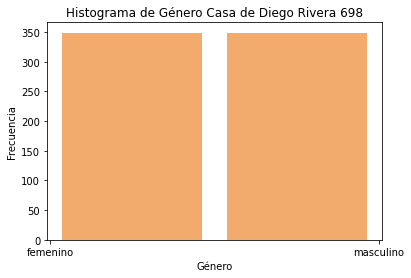

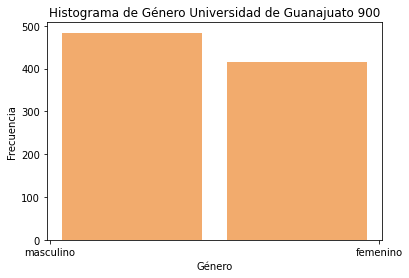

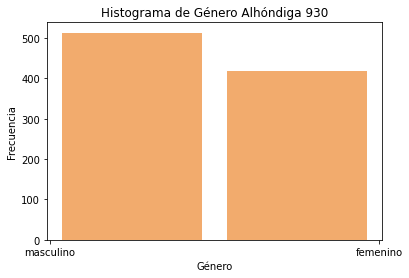

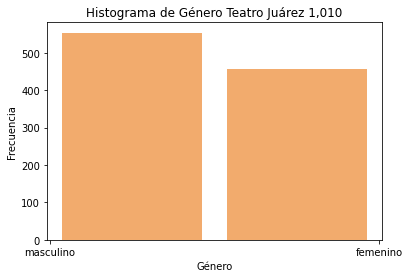

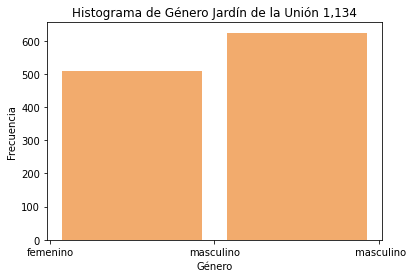

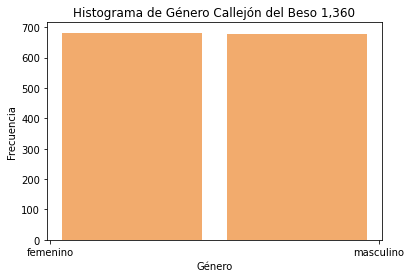

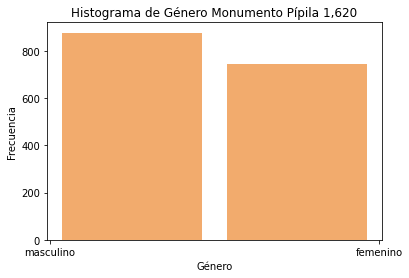

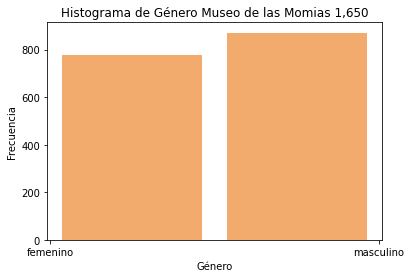

In [94]:
# Obtengo nombres de lugares
for place in dfs.keys() :
  # Obtengo array de edades
  gender = [word.lower() for word in dfs[place]['Género']]
  
  plt.hist(x = gender, bins = 2, color = '#F2AB6D', rwidth = 0.85)
  plt.title('Histograma de Género ' + place)
  plt.xlabel('Género')
  plt.ylabel('Frecuencia')

  plt.show()

### Idioma

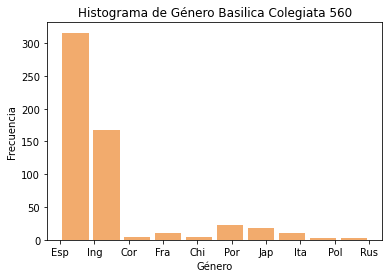

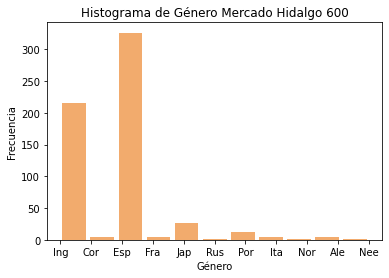

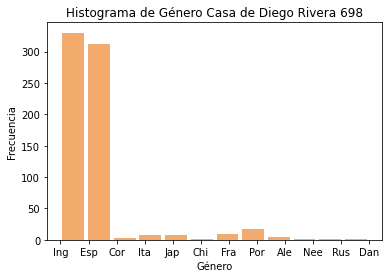

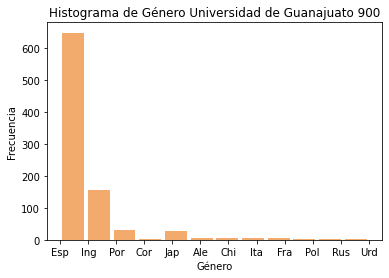

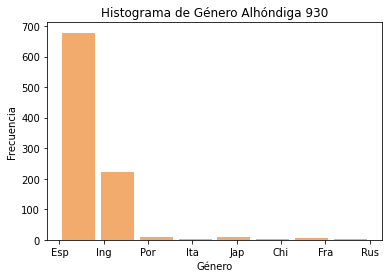

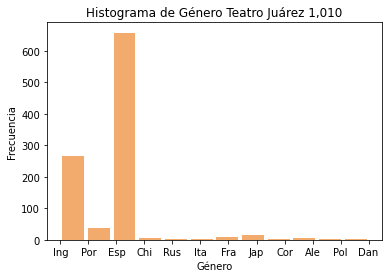

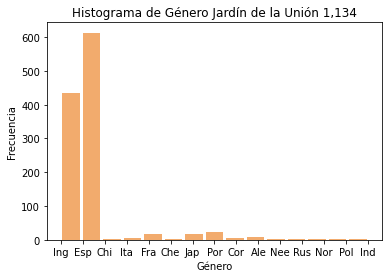

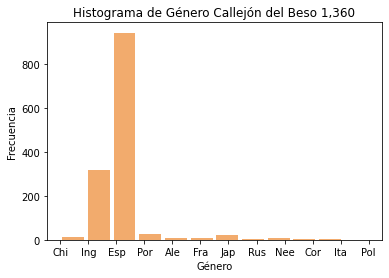

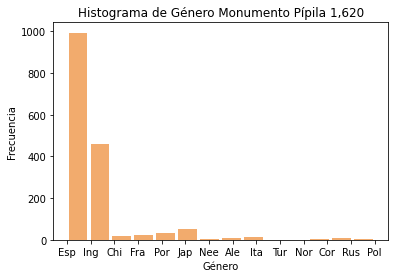

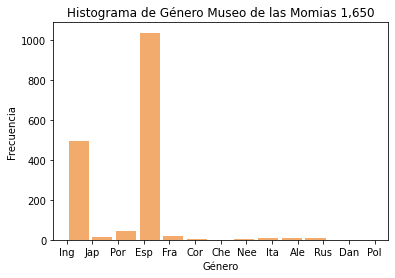

In [50]:
# Obtengo nombres de lugares
for place in dfs.keys() :
  # Obtengo array de edades
  language = [text[:3] for text in dfs[place]['Idioma']]
  # Idiomas únicos
  n_bins   = len(set(language))

  
  plt.hist(x = language, bins = n_bins, color = '#F2AB6D', rwidth = 0.85)
  plt.title('Histograma de Género ' + place)
  plt.xlabel('Género')
  plt.ylabel('Frecuencia')

  plt.show()

# Parte 2

Utilizando una estrategia de feature selection (se sugiere $\chi ^2$ o ganancia de información) visualice con **word_cloud** nubes de palabras el top $ k $ (se sugiere $ 50 $) de palabras más relevantes para cada uno de los $ 10 $ lugares. Note que serán $ 10 $ nubes, una por lugar.

## Funciones Generales

In [51]:
from sklearn.feature_selection import SelectKBest, chi2
from wordcloud import WordCloud
from nltk.corpus import stopwords

In [52]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [53]:
# Cargo conjunto de stopwords
stop_words = stopwords.words('english')
stop_words += stopwords.words('spanish')
stop_words = set(stop_words)

In [54]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(stop_words = stop_words)

In [55]:
def get_opinions_and_labels(table) :
  tittles  = table['Título de la opinión']
  opinions = table['Opinión']
  scale    = table['Escala']
  print(opinions.shape[0], 'opiniones encontradas.')

  tr_txt          = [] # strings limpios
  corpus_palabras = [] # Para frecuencias
  for pair in zip(tittles, opinions) :
    # Concateno título y opinión
    full_opinion = pair[0][1:-1] + ' ' + pair[1][1:-1]
    # tokenizo con TweetTokenizer
    full_opinion = tk.tokenize(full_opinion.lower())
    # Elimino contenido basura
    clean_opinion = []
    for word in full_opinion :
      value = not word.isnumeric()
      value = value and word.find('.') == -1
      value = value and word.find(',') == -1
      value = value and word.find('_') == -1
      value = value and word.find(':') == -1
      value = value and word.find('=') == -1
      if value :
        clean_opinion += [word]
    # Agrego a corpus de todas las palabras
    corpus_palabras += clean_opinion
    # Regreso a string
    full_opinion = ' '.join(clean_opinion)
    # agrego a lista principal
    tr_txt.append(full_opinion)

  # Obtengo clases de Opinión
  # positivo[2] : {4, 5}, neutro[1]  : {3}, negativo[0] : {2, 1}
  tr_y = [0 if value < 3 else 1 if value == 3 else 2 for value in scale]

  # Creo diccionario de frecuencias
  fdist = nltk.FreqDist(corpus_palabras)

  return tr_txt, tr_y, fdist

In [56]:
def make_word_cloud(tr_txt, tr_y, k = 50) :
  # Ajusto a pesado tfidf
  vectors       = tfidf.fit_transform(tr_txt)
  feature_names = tfidf.get_feature_names()
  # Para visualizar pesados
  # df            = pd.DataFrame(denselist, columns = feature_names)

  # Extraigo top k con chi2
  feats = SelectKBest(chi2, k = k)
  feats.fit(vectors, tr_y)
  best  = feats.get_support(indices = True)

  dict_best = dict()
  for index in best:
    # Guardo palabra-frecuencia
    dict_best[feature_names[index]] = feats.scores_[index]

  wc = WordCloud()
  wc.generate_from_frequencies(dict_best)
  plt.axis("off")
  plt.imshow(wc, interpolation = "bilinear")
  plt.show()

## Word Cloud

---------------------------------------------
Basilica Colegiata 560
---------------------------------------------
560 opiniones encontradas.


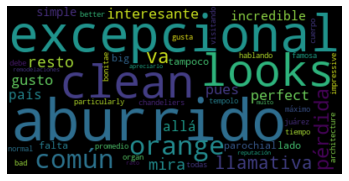

---------------------------------------------
Mercado Hidalgo 600
---------------------------------------------
600 opiniones encontradas.


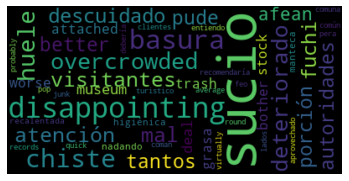

---------------------------------------------
Casa de Diego Rivera 698
---------------------------------------------
698 opiniones encontradas.


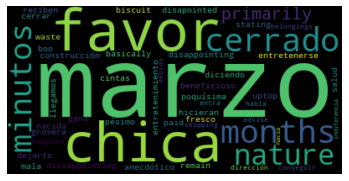

---------------------------------------------
Universidad de Guanajuato 900
---------------------------------------------
900 opiniones encontradas.


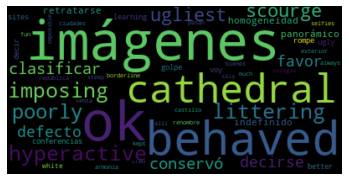

---------------------------------------------
Alhóndiga 930
---------------------------------------------
930 opiniones encontradas.


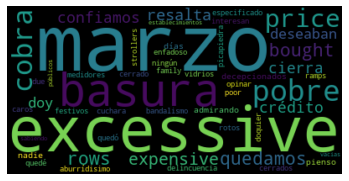

---------------------------------------------
Teatro Juárez 1,010
---------------------------------------------
1010 opiniones encontradas.


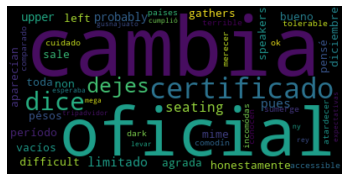

---------------------------------------------
Jardín de la Unión 1,134
---------------------------------------------
1134 opiniones encontradas.


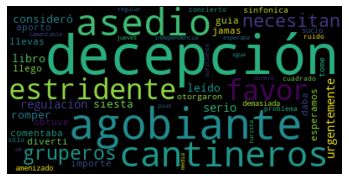

---------------------------------------------
Callejón del Beso 1,360
---------------------------------------------
1360 opiniones encontradas.


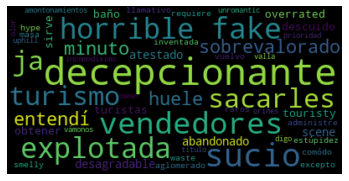

---------------------------------------------
Monumento Pípila 1,620
---------------------------------------------
1620 opiniones encontradas.


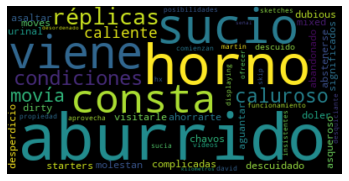

---------------------------------------------
Museo de las Momias 1,650
---------------------------------------------
1650 opiniones encontradas.


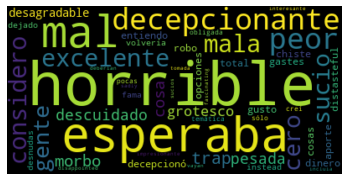

In [57]:
for place in dfs.keys() :
  print('-' * 45)
  print(place)
  print('-' * 45)
  tr_txt, tr_y, _ = get_opinions_and_labels(dfs[place])
  make_word_cloud(tr_txt, tr_y, k = 50)

# Parte 3

 Para cada uno de los $ 10 $ sitios turísticos, haga un descubrimiento automático de los $ 3 $ tópicos con LSA (componentes principales) más relevantes y $ 10 $ palabras contenidas en cada tópico de cada uno de los siguientes subgrupos:


**Antes de aplicar LSA, asegúrese de hacerlo sobre una matriz lo más grande posible
(para su hardware) de TFIDF Normalizada a L2. Note que para cada sitio turístico
deberá saber cuales son los 3 temas de interés y sus palabras, para cada uno de estos subgrupos. Como sugerencia puede usar la función TruncatedSVD de sklearnt
para obtener la descomposición de matrices como se sugiere en el siguiente video
para implementar LSA: https://www.youtube.com/watch?v=hB51kkus-Rc. También
podría llevar a cabo svd con numpy.**

In [95]:
from sklearn.decomposition import TruncatedSVD
from sklearn import preprocessing

In [141]:
def get_opinions_by_gender (table, gender = 'femenino') :
  tittles  = [table['Título de la opinión'][i] for i, gender_ in enumerate(table['Género']) if gender_.lower() == gender]
  opinions = [table['Opinión'][i] for i, gender_ in enumerate(table['Género']) if gender_.lower() == gender]
  scale    = [table['Escala'][i] for i, gender_ in enumerate(table['Género']) if gender_.lower() == gender]

  print(len(opinions), 'opiniones encontradas de género ' + gender)
  
  tr_txt          = [] # strings limpios
  for pair in zip(tittles, opinions) :
    # Concateno título y opinión
    full_opinion = pair[0][1:-1] + ' ' + pair[1][1:-1]
    # tokenizo con TweetTokenizer
    full_opinion = tk.tokenize(full_opinion.lower())
    # Elimino contenido basura
    clean_opinion = []
    for word in full_opinion :
      value = not word.isnumeric()
      value = value and word.find('.') == -1
      value = value and word.find(',') == -1
      value = value and word.find('_') == -1
      value = value and word.find(':') == -1
      value = value and word.find('=') == -1
      if value :
        clean_opinion += [word]
    # Regreso a string
    full_opinion = ' '.join(clean_opinion)
    # agrego a lista principal
    tr_txt.append(full_opinion)

  # Obtengo clases de Opinión
  # positivo[2] : {4, 5}, neutro[1]  : {3}, negativo[0] : {2, 1}
  tr_y = [0 if value < 3 else 1 if value == 3 else 2 for value in scale]

  return tr_txt, scale

In [129]:
def get_opinions_by_nacionality (table, nacionality = 'Nacional') :
  tittles  = [table['Título de la opinión'][i] for i, nacionality_ in enumerate(table['Nacional ó Internacional']) if nacionality_ == nacionality]
  opinions = [table['Opinión'][i] for i, nacionality_ in enumerate(table['Nacional ó Internacional']) if nacionality_ == nacionality]
  scale    = [table['Escala'][i] for i, nacionality_ in enumerate(table['Nacional ó Internacional']) if nacionality_ == nacionality]

  print(len(opinions), 'opiniones encontradas de nacionalidad ' + nacionality)
  
  tr_txt          = [] # strings limpios
  for pair in zip(tittles, opinions) :
    # Concateno título y opinión
    full_opinion = pair[0][1:-1] + ' ' + pair[1][1:-1]
    # tokenizo con TweetTokenizer
    full_opinion = tk.tokenize(full_opinion.lower())
    # Elimino contenido basura
    clean_opinion = []
    for word in full_opinion :
      value = not word.isnumeric()
      value = value and word.find('.') == -1
      value = value and word.find(',') == -1
      value = value and word.find('_') == -1
      value = value and word.find(':') == -1
      value = value and word.find('=') == -1
      if value :
        clean_opinion += [word]
    # Regreso a string
    full_opinion = ' '.join(clean_opinion)
    # agrego a lista principal
    tr_txt.append(full_opinion)

  # Obtengo clases de Opinión
  # positivo[2] : {4, 5}, neutro[1]  : {3}, negativo[0] : {2, 1}
  tr_y = [0 if value < 3 else 1 if value == 3 else 2 for value in scale]

  return tr_txt, tr_y

In [145]:
def get_opinions_by_ages(table, age = 40.0, older = True) :
  # Obtengo clases de acuerdo a promedio
  get_ages = []
  for age_ in table['Edad'] :
    if older :
      if age_ > age :
        get_ages.append(True)
      else :
        get_ages.append(False)
    else :
      if age_ <= age :
        get_ages.append(True)
      else :
        get_ages.append(False)

  tittles  = [table['Título de la opinión'][i] for i, age_ in enumerate(get_ages) if age_]
  opinions = [table['Opinión'][i] for i, age_ in enumerate(get_ages) if age_]
  scale    = [table['Escala'][i] for i, age_ in enumerate(get_ages) if age_]

  print(len(opinions), 'opiniones encontradas.')
  
  tr_txt          = [] # strings limpios
  for pair in zip(tittles, opinions) :
    # Concateno título y opinión
    full_opinion = pair[0][1:-1] + ' ' + pair[1][1:-1]
    # tokenizo con TweetTokenizer
    full_opinion = tk.tokenize(full_opinion.lower())
    # Elimino contenido basura
    clean_opinion = []
    for word in full_opinion :
      value = not word.isnumeric()
      value = value and word.find('.') == -1
      value = value and word.find(',') == -1
      value = value and word.find('_') == -1
      value = value and word.find(':') == -1
      value = value and word.find('=') == -1
      if value :
        clean_opinion += [word]
    # Regreso a string
    full_opinion = ' '.join(clean_opinion)
    # agrego a lista principal
    tr_txt.append(full_opinion)

  # Obtengo clases de Opinión
  # positivo[2] : {4, 5}, neutro[1]  : {3}, negativo[0] : {2, 1}
  tr_y = [0 if value < 3 else 1 if value == 3 else 2 for value in scale]

  return tr_txt, scale

In [131]:
def top_topics_lsa (tr_txt, topics = 3, words = 10) :
  vectors      = tfidf.fit_transform(tr_txt)
  dictionary   = tfidf.get_feature_names()
  # tfidf ya usa norma l2
  # lsa = svd.fit_transform(preprocessing.normalize(vectors, norm = 'l2'))
  svd          = TruncatedSVD(n_components = topics)
  lsa          = svd.fit_transform(vectors)

  # Aggreglo de strings para tablas
  columns = ['topic_' + str(i+1) for i in range(topics)]
  # Creo matriz de encondings
  topic_encoded_df         = pd.DataFrame(lsa, columns = columns)
  topic_encoded_df['body'] = tr_txt
  #display(topic_encoded_df[['body', 'topic_1', 'topic_2', 'topic_3']])
  encoding_matrix = pd.DataFrame(svd.components_,
                                index = columns,
                                columns = dictionary).T

  # Interpretando la matrix de encodings
  columns_abs = ['abs_topic_' + str(i+1) for i in range(topics)]
  # Obtengo valor absoluto de vectores
  for i, topic in enumerate(columns_abs) :
    encoding_matrix[topic] = np.abs(encoding_matrix['topic_' + str(i+1)])
  # Muestro tabla
  table_sorted = encoding_matrix.sort_values('abs_topic_1', ascending = False)[:words]

  display(table_sorted)

  return table_sorted.T.columns[:words]

In [132]:
# Muestro comparación con WordCloud
def show_comparation_wc (dfs, table1, table2, tittle = 'Masculino vs Femenino') :
  for i, place in enumerate(dfs.keys()) :
    dict1 = dict()
    for k, word in enumerate(table1[i]):
      # Guardo palabra-frecuencia
      dict1[word] = 10 - k

    dict2 = dict()
    for k, word in enumerate(table2[i]):
      # Guardo palabra-frecuencia
      dict2[word] = 10 - k

    # Muestro figuras
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (10,10))
    fig.suptitle(place + ' ' + tittle)

    wc = WordCloud()
    wc.generate_from_frequencies(dict1)
    ax1.imshow(wc, interpolation = "bilinear")

    wc = WordCloud()
    wc.generate_from_frequencies(dict2)
    ax2.imshow(wc, interpolation = "bilinear")

    plt.show()

## (a) Hombres


In [135]:
words_masculino = []
for place in dfs.keys() :
  print('-' * 80)
  print(place)
  tr_txt, _ = get_opinions_by_gender(dfs[place], gender = 'masculino')
  print('-' * 80)
  words_masculino.append(top_topics_lsa(tr_txt, topics = 3, words = 10))

--------------------------------------------------------------------------------
Basilica Colegiata 560
317 opiniones encontradas de género masculino
--------------------------------------------------------------------------------


topic_1   topic_2   topic_3  abs_topic_1  abs_topic_2  abs_topic_3
guanajuato  0.311842  0.100817 -0.152992     0.311842     0.100817     0.152992
iglesia     0.265840 -0.119844  0.591615     0.265840     0.119844     0.591615
ciudad      0.255488 -0.109909  0.091827     0.255488     0.109909     0.091827
hermosa     0.233131 -0.101001 -0.080368     0.233131     0.101001     0.080368
basílica    0.205460 -0.078827 -0.213825     0.205460     0.078827     0.213825
centro      0.192306 -0.059938  0.050730     0.192306     0.059938     0.050730
noche       0.185549 -0.086879 -0.144751     0.185549     0.086879     0.144751
lugar       0.180243 -0.073450 -0.271191     0.180243     0.073450     0.271191
bonita      0.151514 -0.067673  0.244155     0.151514     0.067673     0.244155
visitar     0.122628 -0.040713 -0.110607     0.122628     0.040713     0.110607

--------------------------------------------------------------------------------
Mercado Hidalgo 600
328 opiniones encontradas de género masculino
--------------------------------------------------------------------------------


topic_1   topic_2   topic_3  abs_topic_1  abs_topic_2  abs_topic_3
mercado     0.364662 -0.088060  0.434415     0.364662     0.088060     0.434415
comida      0.250218 -0.124231 -0.192037     0.250218     0.124231     0.192037
lugar       0.210310 -0.101767 -0.066951     0.210310     0.101767     0.066951
artesanías  0.165924 -0.085199 -0.051645     0.165924     0.085199     0.051645
comprar     0.165396 -0.079844 -0.157340     0.165396     0.079844     0.157340
comer       0.152456 -0.078847 -0.264863     0.152456     0.078847     0.264863
guanajuato  0.140534  0.015518  0.020528     0.140534     0.015518     0.020528
market      0.129498  0.342652 -0.050601     0.129498     0.342652     0.050601
buen        0.126237 -0.059212 -0.189332     0.126237     0.059212     0.189332
si          0.125340 -0.061421 -0.115590     0.125340     0.061421     0.115590

--------------------------------------------------------------------------------
Casa de Diego Rivera 698
349 opiniones encontradas de género masculino
--------------------------------------------------------------------------------


topic_1   topic_2  ...  abs_topic_2  abs_topic_3
rivera       0.287599  0.092458  ...     0.092458     0.082922
diego        0.277062  0.129327  ...     0.129327     0.112614
museum       0.254942 -0.161203  ...     0.161203     0.242187
art          0.215090 -0.133811  ...     0.133811     0.091470
work         0.189565 -0.118625  ...     0.118625     0.010492
home         0.173941 -0.108538  ...     0.108538     0.236250
interesting  0.147561 -0.089372  ...     0.089372     0.059524
house        0.144520 -0.085862  ...     0.085862     0.186946
casa         0.141791  0.290577  ...     0.290577     0.131934
visit        0.132187 -0.082346  ...     0.082346     0.118528

[10 rows x 6 columns]

--------------------------------------------------------------------------------
Universidad de Guanajuato 900
484 opiniones encontradas de género masculino
--------------------------------------------------------------------------------


topic_1   topic_2  ...  abs_topic_2  abs_topic_3
lugar         0.290178 -0.020686  ...     0.020686     0.524599
guanajuato    0.289699  0.111052  ...     0.111052     0.100172
universidad   0.267228 -0.007619  ...     0.007619     0.166941
arquitectura  0.241853 -0.024668  ...     0.024668     0.190236
ciudad        0.240379 -0.024222  ...     0.024222     0.208544
edificio      0.237181 -0.028547  ...     0.028547     0.315138
hermosa       0.173544 -0.023447  ...     0.023447     0.203764
visitar       0.160391 -0.005090  ...     0.005090     0.181823
vista         0.156271 -0.023487  ...     0.023487     0.094172
si            0.143863 -0.002970  ...     0.002970     0.108792

[10 rows x 6 columns]

--------------------------------------------------------------------------------
Alhóndiga 930
513 opiniones encontradas de género masculino
--------------------------------------------------------------------------------


topic_1   topic_2  ...  abs_topic_2  abs_topic_3
historia       0.392639 -0.039943  ...     0.039943     0.062816
lugar          0.365834 -0.043036  ...     0.043036     0.578920
méxico         0.249401 -0.021150  ...     0.021150     0.113839
museo          0.236071 -0.019326  ...     0.019326     0.400570
independencia  0.224578 -0.017963  ...     0.017963     0.226477
guanajuato     0.175258  0.077096  ...     0.077096     0.010752
visita         0.164481 -0.011842  ...     0.011842     0.000178
visitar        0.145647 -0.012910  ...     0.012910     0.200609
histórico      0.145576 -0.014172  ...     0.014172     0.000029
si             0.145191 -0.014792  ...     0.014792     0.033371

[10 rows x 6 columns]

--------------------------------------------------------------------------------
Teatro Juárez 1,010
554 opiniones encontradas de género masculino
--------------------------------------------------------------------------------


topic_1   topic_2  ...  abs_topic_2  abs_topic_3
teatro        0.361752 -0.015748  ...     0.015748     0.258126
lugar         0.317286 -0.058177  ...     0.058177     0.684115
hermoso       0.263441 -0.044232  ...     0.044232     0.013993
guanajuato    0.213105  0.087650  ...     0.087650     0.049223
arquitectura  0.181110 -0.032647  ...     0.032647     0.047133
ciudad        0.169678 -0.027766  ...     0.027766     0.096962
bonito        0.157734 -0.022614  ...     0.022614     0.056252
historia      0.157409 -0.029047  ...     0.029047     0.066456
visitar       0.148296 -0.017342  ...     0.017342     0.117729
visita        0.126465 -0.016191  ...     0.016191     0.005288

[10 rows x 6 columns]

--------------------------------------------------------------------------------
Jardín de la Unión 1,134
623 opiniones encontradas de género masculino
--------------------------------------------------------------------------------


topic_1   topic_2  ...  abs_topic_2  abs_topic_3
lugar         0.284811 -0.251456  ...     0.251456     0.403533
guanajuato    0.215563 -0.045455  ...     0.045455     0.147960
restaurantes  0.192362 -0.157421  ...     0.157421     0.074621
place         0.169980  0.246169  ...     0.246169     0.065914
jardín        0.165524 -0.116175  ...     0.116175     0.177750
teatro        0.157249 -0.058875  ...     0.058875     0.129984
ciudad        0.156253 -0.127484  ...     0.127484     0.311060
bonito        0.152909 -0.131685  ...     0.131685     0.248998
plaza         0.149713  0.026845  ...     0.026845     0.318077
people        0.148024  0.212659  ...     0.212659     0.035818

[10 rows x 6 columns]

--------------------------------------------------------------------------------
Callejón del Beso 1,360
678 opiniones encontradas de género masculino
--------------------------------------------------------------------------------


topic_1   topic_2   topic_3  abs_topic_1  abs_topic_2  abs_topic_3
lugar       0.321211 -0.038298 -0.237205     0.321211     0.038298     0.237205
beso        0.271732  0.033503 -0.016131     0.271732     0.033503     0.016131
callejón    0.267985 -0.007599  0.108769     0.267985     0.007599     0.108769
si          0.223123 -0.018802  0.057587     0.223123     0.018802     0.057587
historia    0.217577 -0.019727 -0.154029     0.217577     0.019727     0.154029
guanajuato  0.213908  0.135281  0.192425     0.213908     0.135281     0.192425
pareja      0.213623 -0.024163 -0.057667     0.213623     0.024163     0.057667
leyenda     0.191164 -0.022698 -0.058077     0.191164     0.022698     0.058077
visita      0.153836  0.004338  0.545030     0.153836     0.004338     0.545030
foto        0.151101 -0.018783  0.064635     0.151101     0.018783     0.064635

--------------------------------------------------------------------------------
Monumento Pípila 1,620
877 opiniones encontradas de género masculino
--------------------------------------------------------------------------------


topic_1   topic_2   topic_3  abs_topic_1  abs_topic_2  abs_topic_3
vista       0.421910 -0.067089  0.035346     0.421910     0.067089     0.035346
ciudad      0.339460 -0.061469  0.100616     0.339460     0.061469     0.100616
guanajuato  0.261453  0.100092  0.127265     0.261453     0.100092     0.127265
monumento   0.197052 -0.028094  0.003875     0.197052     0.028094     0.003875
lugar       0.192437 -0.033209  0.304757     0.192437     0.033209     0.304757
mejor       0.164766 -0.022478 -0.137078     0.164766     0.022478     0.137078
subir       0.158701 -0.022620 -0.294336     0.158701     0.022620     0.294336
pípila      0.149275 -0.020221  0.020493     0.149275     0.020221     0.020493
puedes      0.142445 -0.021983  0.078157     0.142445     0.021983     0.078157
hermosa     0.141224 -0.024584  0.119531     0.141224     0.024584     0.119531

--------------------------------------------------------------------------------
Museo de las Momias 1,650
871 opiniones encontradas de género masculino
--------------------------------------------------------------------------------


topic_1   topic_2  ...  abs_topic_2  abs_topic_3
museo        0.340334 -0.038109  ...     0.038109     0.178499
momias       0.331277 -0.023605  ...     0.023605     0.261622
guanajuato   0.258118  0.071584  ...     0.071584     0.181388
lugar        0.211801 -0.031702  ...     0.031702     0.309284
visita       0.204742 -0.027467  ...     0.027467     0.377674
si           0.189809 -0.026492  ...     0.026492     0.139172
interesante  0.185254 -0.027252  ...     0.027252     0.198152
ver          0.151479 -0.022525  ...     0.022525     0.164834
ir           0.127745 -0.016593  ...     0.016593     0.122753
cuerpos      0.119545 -0.016571  ...     0.016571     0.255247

[10 rows x 6 columns]

## (b) Mujeres

In [136]:
words_femenino = []
for place in dfs.keys() :
  print('-' * 80)
  print(place)
  tr_txt, _ = get_opinions_by_gender(dfs[place], gender = 'femenino')
  print('-' * 80)

  words_femenino.append(top_topics_lsa(tr_txt, topics = 3, words = 10))

--------------------------------------------------------------------------------
Basilica Colegiata 560
243 opiniones encontradas de género femenino
--------------------------------------------------------------------------------


topic_1   topic_2  ...  abs_topic_2  abs_topic_3
hermosa       0.309886 -0.085437  ...     0.085437     0.147900
iglesia       0.300216 -0.075092  ...     0.075092     0.154035
guanajuato    0.244478  0.135491  ...     0.135491     0.051311
ciudad        0.240862 -0.059376  ...     0.059376     0.038296
bonita        0.207662 -0.055149  ...     0.055149     0.533737
basílica      0.190341 -0.049689  ...     0.049689     0.020488
noche         0.183188 -0.047179  ...     0.047179     0.098954
lugar         0.173124 -0.045002  ...     0.045002     0.307400
dentro        0.171804 -0.051719  ...     0.051719     0.337256
arquitectura  0.161308 -0.038821  ...     0.038821     0.038238

[10 rows x 6 columns]

--------------------------------------------------------------------------------
Mercado Hidalgo 600
272 opiniones encontradas de género femenino
--------------------------------------------------------------------------------


topic_1   topic_2   topic_3  abs_topic_1  abs_topic_2  abs_topic_3
mercado     0.360330 -0.057198 -0.266999     0.360330     0.057198     0.266999
lugar       0.235823 -0.057659  0.036983     0.235823     0.057659     0.036983
comida      0.229167 -0.054436  0.092685     0.229167     0.054436     0.092685
artesanías  0.185739 -0.046404 -0.050700     0.185739     0.046404     0.050700
comprar     0.181452 -0.040908  0.029037     0.181452     0.040908     0.029037
si          0.168657 -0.033248  0.305250     0.168657     0.033248     0.305250
comer       0.164607 -0.036482  0.281621     0.164607     0.036482     0.281621
dulces      0.158255 -0.036672 -0.028230     0.158255     0.036672     0.028230
buen        0.148069 -0.036591  0.134613     0.148069     0.036591     0.134613
guanajuato  0.137594  0.009080  0.122133     0.137594     0.009080     0.122133

--------------------------------------------------------------------------------
Casa de Diego Rivera 698
349 opiniones encontradas de género femenino
--------------------------------------------------------------------------------


topic_1   topic_2  ...  abs_topic_2  abs_topic_3
diego        0.306916  0.157031  ...     0.157031     0.081907
rivera       0.302803  0.108749  ...     0.108749     0.100470
museum       0.267803 -0.134243  ...     0.134243     0.027705
art          0.222998 -0.123217  ...     0.123217     0.295380
see          0.201956 -0.109502  ...     0.109502     0.143787
interesting  0.201943 -0.109517  ...     0.109517     0.022889
house        0.170315 -0.086191  ...     0.086191     0.142259
work         0.165871 -0.085605  ...     0.085605     0.161774
home         0.163842 -0.082884  ...     0.082884     0.259608
visit        0.142026 -0.077296  ...     0.077296     0.254288

[10 rows x 6 columns]

--------------------------------------------------------------------------------
Universidad de Guanajuato 900
416 opiniones encontradas de género femenino
--------------------------------------------------------------------------------


topic_1   topic_2  ...  abs_topic_2  abs_topic_3
edificio      0.288417 -0.021440  ...     0.021440     0.593971
universidad   0.284142 -0.007824  ...     0.007824     0.043644
guanajuato    0.261448  0.089011  ...     0.089011     0.058204
arquitectura  0.246936 -0.008015  ...     0.008015     0.321402
ciudad        0.200430 -0.008359  ...     0.008359     0.086391
hermosa       0.198200 -0.015951  ...     0.015951     0.043419
vista         0.182733 -0.016541  ...     0.016541     0.112607
lugar         0.180138  0.009360  ...     0.009360     0.216109
hermoso       0.165863 -0.016253  ...     0.016253     0.278040
escaleras     0.161146 -0.014079  ...     0.014079     0.027950

[10 rows x 6 columns]

--------------------------------------------------------------------------------
Alhóndiga 930
417 opiniones encontradas de género femenino
--------------------------------------------------------------------------------


topic_1   topic_2  ...  abs_topic_2  abs_topic_3
historia       0.422670 -0.026404  ...     0.026404     0.159607
lugar          0.370867 -0.025850  ...     0.025850     0.493027
museo          0.263247 -0.015443  ...     0.015443     0.446263
méxico         0.198408 -0.012027  ...     0.012027     0.006565
guanajuato     0.178993  0.073328  ...     0.073328     0.032096
independencia  0.146899 -0.002463  ...     0.002463     0.079412
interesante    0.136955 -0.009460  ...     0.009460     0.150587
conocer        0.136724 -0.005236  ...     0.005236     0.199090
visitar        0.131458 -0.007327  ...     0.007327     0.090765
si             0.123544 -0.002966  ...     0.002966     0.040977

[10 rows x 6 columns]

--------------------------------------------------------------------------------
Teatro Juárez 1,010
456 opiniones encontradas de género femenino
--------------------------------------------------------------------------------


topic_1   topic_2  ...  abs_topic_2  abs_topic_3
teatro        0.325297  0.010991  ...     0.010991     0.216696
lugar         0.313597 -0.039197  ...     0.039197     0.537224
hermoso       0.293589 -0.028768  ...     0.028768     0.015435
guanajuato    0.198754  0.062416  ...     0.062416     0.065584
arquitectura  0.189587 -0.014092  ...     0.014092     0.141883
historia      0.184123 -0.017875  ...     0.017875     0.195370
pena          0.177153 -0.020087  ...     0.020087     0.332785
vale          0.159123 -0.019050  ...     0.019050     0.292808
dentro        0.144827 -0.015333  ...     0.015333     0.064315
visita        0.125703 -0.008150  ...     0.008150     0.102147

[10 rows x 6 columns]

--------------------------------------------------------------------------------
Jardín de la Unión 1,134
510 opiniones encontradas de género femenino
--------------------------------------------------------------------------------


topic_1   topic_2  ...  abs_topic_2  abs_topic_3
lugar         0.293689 -0.165718  ...     0.165718     0.095820
restaurantes  0.211994 -0.114248  ...     0.114248     0.110374
jardín        0.211205 -0.105746  ...     0.105746     0.132453
guanajuato    0.207282 -0.009868  ...     0.009868     0.109837
teatro        0.158796 -0.027196  ...     0.027196     0.192815
hermoso       0.152335 -0.080042  ...     0.080042     0.045927
place         0.137172  0.306113  ...     0.306113     0.038305
agradable     0.127142 -0.074580  ...     0.074580     0.115369
disfrutar     0.126078 -0.070942  ...     0.070942     0.169307
gente         0.124023 -0.067232  ...     0.067232     0.029969

[10 rows x 6 columns]

--------------------------------------------------------------------------------
Callejón del Beso 1,360
682 opiniones encontradas de género femenino
--------------------------------------------------------------------------------


topic_1   topic_2   topic_3  abs_topic_1  abs_topic_2  abs_topic_3
lugar       0.293543 -0.031893 -0.489952     0.293543     0.031893     0.489952
callejón    0.272130 -0.005573  0.296766     0.272130     0.005573     0.296766
beso        0.237674  0.031380  0.290146     0.237674     0.031380     0.290146
si          0.232093 -0.019812  0.049608     0.232093     0.019812     0.049608
historia    0.203803 -0.025792 -0.165151     0.203803     0.025792     0.165151
foto        0.198092 -0.021897 -0.039632     0.198092     0.021897     0.039632
guanajuato  0.197058  0.099881  0.013490     0.197058     0.099881     0.013490
leyenda     0.190667 -0.014065  0.146851     0.190667     0.014065     0.146851
pareja      0.174705 -0.017166  0.099282     0.174705     0.017166     0.099282
romántico   0.152793 -0.016870  0.011243     0.152793     0.016870     0.011243

--------------------------------------------------------------------------------
Monumento Pípila 1,620
743 opiniones encontradas de género femenino
--------------------------------------------------------------------------------


topic_1   topic_2   topic_3  abs_topic_1  abs_topic_2  abs_topic_3
vista       0.419136 -0.049235  0.207730     0.419136     0.049235     0.207730
ciudad      0.343759 -0.047896  0.162387     0.343759     0.047896     0.162387
guanajuato  0.249285  0.090120 -0.005009     0.249285     0.090120     0.005009
monumento   0.213430 -0.021778  0.317681     0.213430     0.021778     0.317681
lugar       0.213098 -0.031205  0.082904     0.213098     0.031205     0.082904
puedes      0.170594 -0.019940 -0.415517     0.170594     0.019940     0.415517
mejor       0.162528 -0.018755 -0.024940     0.162528     0.018755     0.024940
subir       0.157932 -0.018091 -0.276821     0.157932     0.018091     0.276821
hermosa     0.152036 -0.015785  0.139879     0.152036     0.015785     0.139879
pípila      0.137712 -0.012292  0.138233     0.137712     0.012292     0.138233

--------------------------------------------------------------------------------
Museo de las Momias 1,650
779 opiniones encontradas de género femenino
--------------------------------------------------------------------------------


topic_1   topic_2  ...  abs_topic_2  abs_topic_3
momias       0.323498 -0.024449  ...     0.024449     0.035321
museo        0.319007 -0.032570  ...     0.032570     0.022206
interesante  0.221888 -0.028843  ...     0.028843     0.070691
guanajuato   0.212671  0.090867  ...     0.090867     0.169772
si           0.201131 -0.023086  ...     0.023086     0.048747
lugar        0.196881 -0.023666  ...     0.023666     0.422682
visita       0.178650 -0.017768  ...     0.017768     0.472691
ver          0.165736 -0.019376  ...     0.019376     0.020617
bien         0.164707 -0.021790  ...     0.021790     0.049355
historia     0.116982 -0.013456  ...     0.013456     0.086201

[10 rows x 6 columns]

## Masculino vs Femenino WordCloud

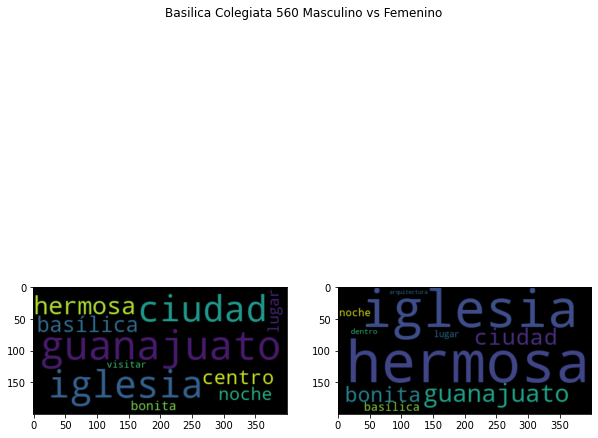

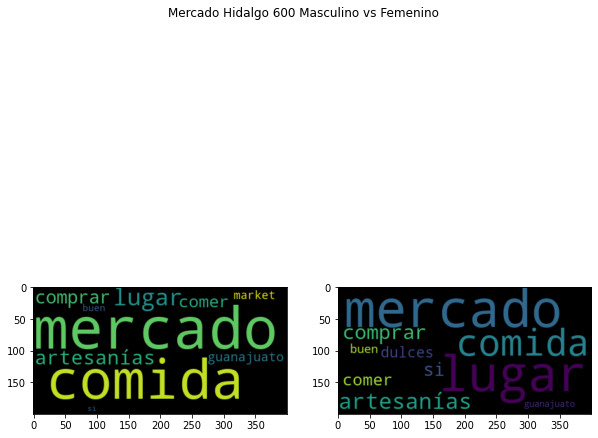

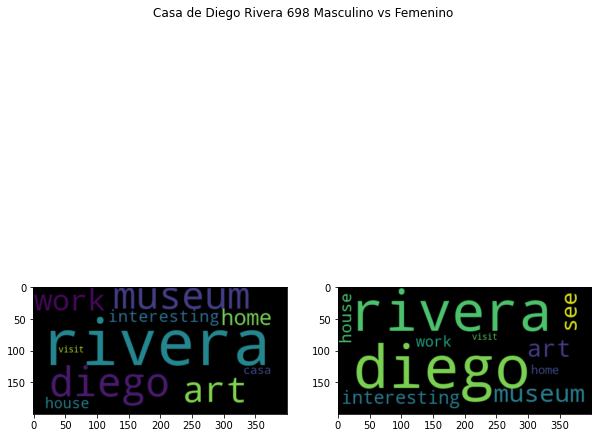

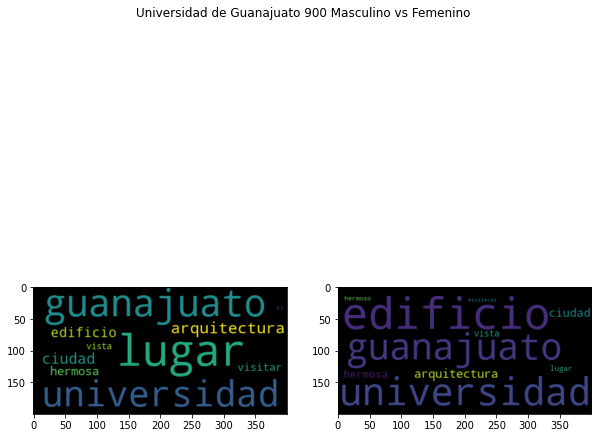

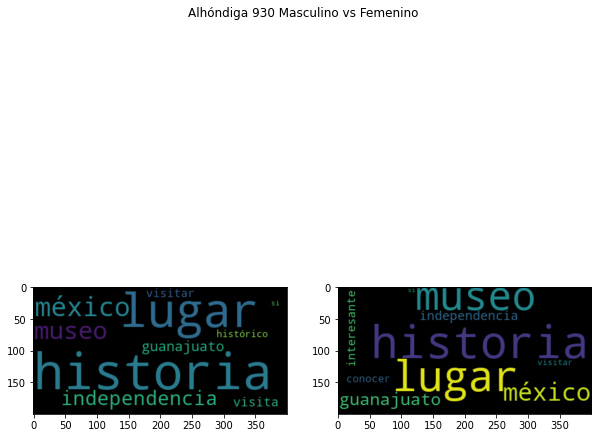

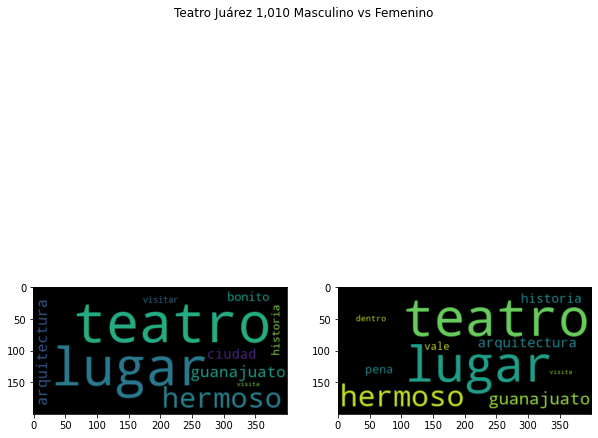

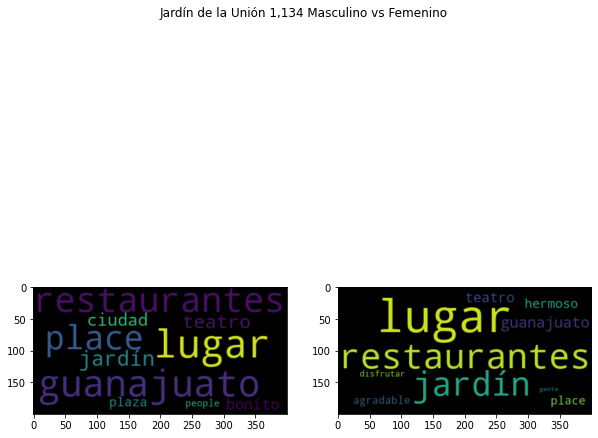

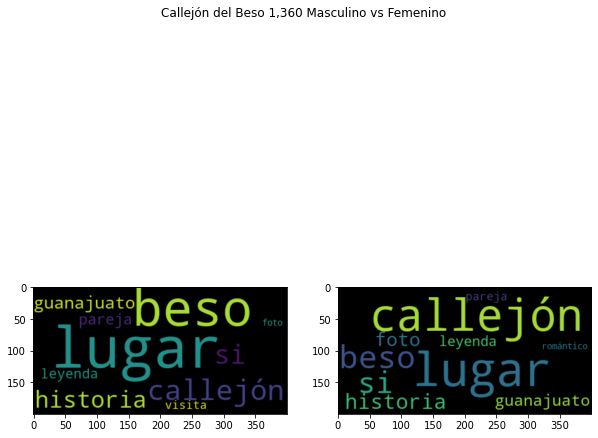

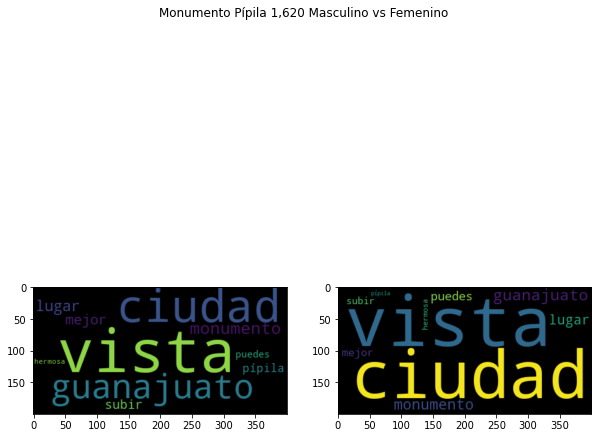

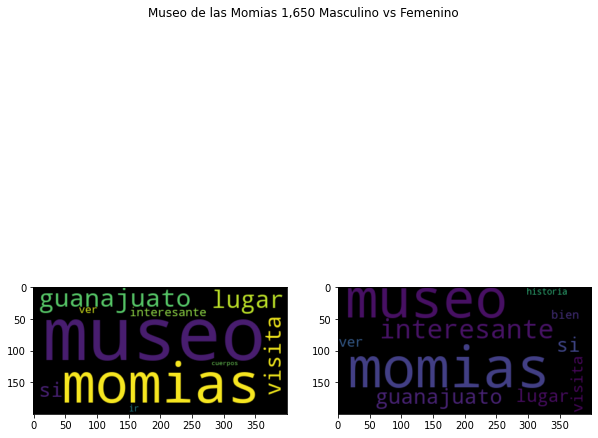

In [137]:
show_comparation_wc(dfs, words_masculino, words_femenino, tittle = 'Masculino vs Femenino')

## (c) Turistas Nacionales

In [107]:
words_nacional = []
for place in dfs.keys() :
  print('-' * 80)
  print(place)
  tr_txt, _ = get_opinions_by_nacionality(dfs[place], nacionality = 'Nacional')
  print('-' * 80)
  words_nacional.append(top_topics_lsa(tr_txt, topics = 3, words = 10))

--------------------------------------------------------------------------------
Basilica Colegiata 560
276 opiniones encontradas de nacionalidad Nacional
--------------------------------------------------------------------------------


topic_1   topic_2  ...  abs_topic_2  abs_topic_3
guanajuato    0.293757 -0.149186  ...     0.149186     0.203872
hermosa       0.276196 -0.012445  ...     0.012445     0.458551
ciudad        0.243115  0.036611  ...     0.036611     0.030877
iglesia       0.226707  0.200217  ...     0.200217     0.129465
bonita        0.218219  0.497849  ...     0.497849     0.184109
basílica      0.208925 -0.009535  ...     0.009535     0.029125
lugar         0.201736 -0.376667  ...     0.376667     0.207120
noche         0.182839 -0.078775  ...     0.078775     0.397346
centro        0.177621  0.007365  ...     0.007365     0.033453
arquitectura  0.170200 -0.063560  ...     0.063560     0.033440

[10 rows x 6 columns]

--------------------------------------------------------------------------------
Mercado Hidalgo 600
299 opiniones encontradas de nacionalidad Nacional
--------------------------------------------------------------------------------


topic_1   topic_2   topic_3  abs_topic_1  abs_topic_2  abs_topic_3
mercado     0.322360 -0.289312  0.117197     0.322360     0.289312     0.117197
comida      0.258740  0.074383 -0.099139     0.258740     0.074383     0.099139
lugar       0.225089 -0.040100 -0.069655     0.225089     0.040100     0.069655
artesanías  0.205538 -0.096135 -0.118096     0.205538     0.096135     0.118096
comprar     0.182008  0.084584 -0.044473     0.182008     0.084584     0.044473
comer       0.178518  0.345334  0.016434     0.178518     0.345334     0.016434
si          0.169841  0.229079  0.076802     0.169841     0.229079     0.076802
dulces      0.159666 -0.060037 -0.039029     0.159666     0.060037     0.039029
buen        0.145995  0.087255 -0.065448     0.145995     0.087255     0.065448
precios     0.137746  0.093237 -0.056096     0.137746     0.093237     0.056096

--------------------------------------------------------------------------------
Casa de Diego Rivera 698
270 opiniones encontradas de nacionalidad Nacional
--------------------------------------------------------------------------------


topic_1   topic_2  ...  abs_topic_2  abs_topic_3
diego         0.305490  0.169615  ...     0.169615     0.045348
museo         0.273678 -0.061994  ...     0.061994     0.114073
casa          0.266915 -0.032970  ...     0.032970     0.096875
rivera        0.260202  0.204633  ...     0.204633     0.078531
obras         0.230499 -0.033975  ...     0.033975     0.087492
lugar         0.176173 -0.060851  ...     0.060851     0.335034
arte          0.155601 -0.055494  ...     0.055494     0.278337
excelente     0.145248 -0.034025  ...     0.034025     0.123744
visita        0.140158 -0.005570  ...     0.005570     0.108210
exposiciones  0.134789 -0.014120  ...     0.014120     0.019565

[10 rows x 6 columns]

--------------------------------------------------------------------------------
Universidad de Guanajuato 900
573 opiniones encontradas de nacionalidad Nacional
--------------------------------------------------------------------------------


topic_1   topic_2  ...  abs_topic_2  abs_topic_3
guanajuato    0.289147  0.285872  ...     0.285872     0.258121
lugar         0.260061  0.409910  ...     0.409910     0.262053
arquitectura  0.255757  0.233198  ...     0.233198     0.131284
edificio      0.239632 -0.356790  ...     0.356790     0.403126
universidad   0.231157  0.004649  ...     0.004649     0.113821
ciudad        0.203221 -0.020748  ...     0.020748     0.091772
hermosa       0.175247 -0.127317  ...     0.127317     0.173112
vista         0.165763 -0.092901  ...     0.092901     0.020885
escaleras     0.150493 -0.102476  ...     0.102476     0.082691
visitar       0.142043  0.150493  ...     0.150493     0.009102

[10 rows x 6 columns]

--------------------------------------------------------------------------------
Alhóndiga 930
630 opiniones encontradas de nacionalidad Nacional
--------------------------------------------------------------------------------


topic_1   topic_2  ...  abs_topic_2  abs_topic_3
historia       0.375200 -0.180661  ...     0.180661     0.080820
lugar          0.356352 -0.510724  ...     0.510724     0.048484
museo          0.250556  0.427680  ...     0.427680     0.233104
méxico         0.219441 -0.062209  ...     0.062209     0.133589
independencia  0.192519  0.043458  ...     0.043458     0.245533
guanajuato     0.186467  0.002792  ...     0.002792     0.247334
visita         0.152728  0.097368  ...     0.097368     0.411536
si             0.147911  0.109149  ...     0.109149     0.288260
visitar        0.145238 -0.130768  ...     0.130768     0.019437
parte          0.128789  0.016580  ...     0.016580     0.018741

[10 rows x 6 columns]

--------------------------------------------------------------------------------
Teatro Juárez 1,010
586 opiniones encontradas de nacionalidad Nacional
--------------------------------------------------------------------------------


topic_1   topic_2  ...  abs_topic_2  abs_topic_3
lugar         0.331957  0.602591  ...     0.602591     0.142452
teatro        0.315235 -0.206909  ...     0.206909     0.043675
hermoso       0.271530 -0.065536  ...     0.065536     0.165808
guanajuato    0.212384  0.048013  ...     0.048013     0.270690
historia      0.182435  0.278061  ...     0.278061     0.187983
arquitectura  0.176453  0.116429  ...     0.116429     0.143672
dentro        0.150384 -0.156676  ...     0.156676     0.022581
pena          0.141959 -0.226086  ...     0.226086     0.381736
ciudad        0.140592 -0.064166  ...     0.064166     0.216266
vale          0.136999 -0.220315  ...     0.220315     0.377180

[10 rows x 6 columns]

--------------------------------------------------------------------------------
Jardín de la Unión 1,134
572 opiniones encontradas de nacionalidad Nacional
--------------------------------------------------------------------------------


topic_1   topic_2  ...  abs_topic_2  abs_topic_3
lugar         0.326765 -0.091258  ...     0.091258     0.053760
restaurantes  0.220726  0.016344  ...     0.016344     0.060180
jardín        0.218917  0.051117  ...     0.051117     0.192142
guanajuato    0.211103  0.146394  ...     0.146394     0.119077
bonito        0.177184  0.005202  ...     0.005202     0.040045
teatro        0.165046  0.146598  ...     0.146598     0.158134
ciudad        0.149822  0.116681  ...     0.116681     0.213685
pasar         0.139763 -0.150383  ...     0.150383     0.261963
hermoso       0.139455 -0.014987  ...     0.014987     0.005864
agradable     0.134858 -0.082738  ...     0.082738     0.082141

[10 rows x 6 columns]

--------------------------------------------------------------------------------
Callejón del Beso 1,360
806 opiniones encontradas de nacionalidad Nacional
--------------------------------------------------------------------------------


topic_1   topic_2   topic_3  abs_topic_1  abs_topic_2  abs_topic_3
lugar       0.292366  0.092774 -0.402885     0.292366     0.092774     0.402885
callejón    0.261089 -0.043159  0.180419     0.261089     0.043159     0.180419
beso        0.251381  0.168534  0.254049     0.251381     0.168534     0.254049
si          0.224935  0.033295  0.137540     0.224935     0.033295     0.137540
guanajuato  0.211752 -0.165819  0.102481     0.211752     0.165819     0.102481
historia    0.201696  0.185396 -0.170920     0.201696     0.185396     0.170920
pareja      0.201365  0.138394  0.156227     0.201365     0.138394     0.156227
leyenda     0.187427  0.037259  0.041153     0.187427     0.037259     0.041153
foto        0.180624 -0.247358 -0.048540     0.180624     0.247358     0.048540
ir          0.154162  0.009999  0.018061     0.154162     0.009999     0.018061

--------------------------------------------------------------------------------
Monumento Pípila 1,620
785 opiniones encontradas de nacionalidad Nacional
--------------------------------------------------------------------------------


topic_1   topic_2   topic_3  abs_topic_1  abs_topic_2  abs_topic_3
vista       0.392660 -0.047675  0.005463     0.392660     0.047675     0.005463
ciudad      0.312043 -0.058461  0.102504     0.312043     0.058461     0.102504
guanajuato  0.259751  0.145030  0.123710     0.259751     0.145030     0.123710
lugar       0.220416 -0.051372  0.403500     0.220416     0.051372     0.403500
monumento   0.195677 -0.017140  0.024954     0.195677     0.017140     0.024954
mejor       0.180112  0.032274 -0.194341     0.180112     0.032274     0.194341
puedes      0.165713 -0.002866 -0.029809     0.165713     0.002866     0.029809
subir       0.160356  0.020777 -0.345612     0.160356     0.020777     0.345612
pípila      0.146075  0.005735 -0.009386     0.146075     0.005735     0.009386
si          0.144739  0.016344 -0.055716     0.144739     0.016344     0.055716

--------------------------------------------------------------------------------
Museo de las Momias 1,650
842 opiniones encontradas de nacionalidad Nacional
--------------------------------------------------------------------------------


topic_1   topic_2  ...  abs_topic_2  abs_topic_3
museo        0.311101 -0.022664  ...     0.022664     0.113557
momias       0.292190 -0.003255  ...     0.003255     0.094714
guanajuato   0.249316  0.196887  ...     0.196887     0.220625
lugar        0.213593 -0.050433  ...     0.050433     0.431639
si           0.209302  0.006550  ...     0.006550     0.115390
visita       0.202210  0.041676  ...     0.041676     0.437252
interesante  0.193280 -0.033066  ...     0.033066     0.069620
ver          0.152574 -0.013817  ...     0.013817     0.106396
ir           0.143219  0.002109  ...     0.002109     0.017827
bien         0.125124 -0.016910  ...     0.016910     0.030336

[10 rows x 6 columns]

## (c) Turistas Internacionales


In [108]:
words_internacional = []
for place in dfs.keys() :
  print('-' * 80)
  print(place)
  tr_txt, _ = get_opinions_by_nacionality(dfs[place], nacionality = 'Internacional')
  print('-' * 80)
  words_internacional.append(top_topics_lsa(tr_txt, topics = 3, words = 10))

--------------------------------------------------------------------------------
Basilica Colegiata 560
284 opiniones encontradas de nacionalidad Internacional
--------------------------------------------------------------------------------


topic_1   topic_2   topic_3  abs_topic_1  abs_topic_2  abs_topic_3
beautiful   0.403031 -0.126968 -0.062996     0.403031     0.126968     0.062996
basilica    0.279951 -0.067745 -0.209854     0.279951     0.067745     0.209854
church      0.247545 -0.076528  0.305085     0.247545     0.076528     0.305085
guanajuato  0.243396  0.119355 -0.061248     0.243396     0.119355     0.061248
inside      0.219379 -0.070116 -0.025166     0.219379     0.070116     0.025166
city        0.188177 -0.051181 -0.014712     0.188177     0.051181     0.014712
see         0.186356 -0.055552 -0.063273     0.186356     0.055552     0.063273
one         0.158356 -0.045538 -0.085728     0.158356     0.045538     0.085728
must        0.139435 -0.039970 -0.067147     0.139435     0.039970     0.067147
visit       0.118110 -0.031050  0.096917     0.118110     0.031050     0.096917

--------------------------------------------------------------------------------
Mercado Hidalgo 600
301 opiniones encontradas de nacionalidad Internacional
--------------------------------------------------------------------------------


topic_1   topic_2   topic_3  abs_topic_1  abs_topic_2  abs_topic_3
market     0.361177 -0.056390  0.166430     0.361177     0.056390     0.166430
food       0.281624 -0.039174  0.037647     0.281624     0.039174     0.037647
great      0.192524 -0.024230 -0.145173     0.192524     0.024230     0.145173
place      0.166508 -0.018057 -0.257390     0.166508     0.018057     0.257390
stalls     0.148135 -0.022566  0.150219     0.148135     0.022566     0.150219
building   0.147463 -0.024985  0.040485     0.147463     0.024985     0.040485
souvenirs  0.144840 -0.011880  0.004391     0.144840     0.011880     0.004391
buy        0.135125 -0.017354 -0.007988     0.135125     0.017354     0.007988
visit      0.134504 -0.019225  0.143565     0.134504     0.019225     0.143565
local      0.132330  0.045398  0.157552     0.132330     0.045398     0.157552

--------------------------------------------------------------------------------
Casa de Diego Rivera 698
428 opiniones encontradas de nacionalidad Internacional
--------------------------------------------------------------------------------


topic_1   topic_2  ...  abs_topic_2  abs_topic_3
museum       0.281909 -0.064884  ...     0.064884     0.044765
rivera       0.265133  0.185091  ...     0.185091     0.065271
diego        0.256131  0.196158  ...     0.196158     0.054387
art          0.240231 -0.061340  ...     0.061340     0.310335
interesting  0.195184 -0.048527  ...     0.048527     0.178544
work         0.192103 -0.044043  ...     0.044043     0.166312
home         0.191751 -0.040809  ...     0.040809     0.235837
see          0.177779 -0.043796  ...     0.043796     0.091380
house        0.162027 -0.036801  ...     0.036801     0.150500
visit        0.159157 -0.041995  ...     0.041995     0.399010

[10 rows x 6 columns]

--------------------------------------------------------------------------------
Universidad de Guanajuato 900
327 opiniones encontradas de nacionalidad Internacional
--------------------------------------------------------------------------------


topic_1   topic_2  ...  abs_topic_2  abs_topic_3
building     0.273922  0.236931  ...     0.236931     0.095391
universidad  0.254097 -0.309417  ...     0.309417     0.201132
beautiful    0.231270  0.197866  ...     0.197866     0.052566
guanajuato   0.224835 -0.100990  ...     0.100990     0.183045
edificio     0.199605 -0.255542  ...     0.255542     0.041919
university   0.190738  0.155801  ...     0.155801     0.200967
stairs       0.175710  0.149904  ...     0.149904     0.329447
ciudad       0.170269 -0.217213  ...     0.217213     0.113659
steps        0.159260  0.135258  ...     0.135258     0.147472
great        0.158387  0.135458  ...     0.135458     0.236794

[10 rows x 6 columns]

--------------------------------------------------------------------------------
Alhóndiga 930
300 opiniones encontradas de nacionalidad Internacional
--------------------------------------------------------------------------------


topic_1   topic_2  ...  abs_topic_2  abs_topic_3
history       0.336930 -0.026959  ...     0.026959     0.239889
museum        0.262042 -0.022644  ...     0.022644     0.045467
mexican       0.227258 -0.017271  ...     0.017271     0.088120
building      0.189468 -0.014907  ...     0.014907     0.091016
independence  0.173548 -0.008514  ...     0.008514     0.006854
place         0.172881 -0.021741  ...     0.021741     0.226274
spanish       0.166011 -0.015436  ...     0.015436     0.132938
great         0.158668 -0.013962  ...     0.013962     0.068919
well          0.155045 -0.016065  ...     0.016065     0.258278
mexico        0.145459  0.028442  ...     0.028442     0.074892

[10 rows x 6 columns]

--------------------------------------------------------------------------------
Teatro Juárez 1,010
424 opiniones encontradas de nacionalidad Internacional
--------------------------------------------------------------------------------


topic_1   topic_2   topic_3  abs_topic_1  abs_topic_2  abs_topic_3
beautiful   0.314971 -0.090072  0.046923     0.314971     0.090072     0.046923
theater     0.253261 -0.063353 -0.465113     0.253261     0.063353     0.465113
see         0.212310 -0.058901 -0.070773     0.212310     0.058901     0.070773
theatre     0.203300 -0.058132  0.581670     0.203300     0.058132     0.581670
inside      0.192606 -0.055383  0.019830     0.192606     0.055383     0.019830
building    0.178047 -0.046444 -0.042455     0.178047     0.046444     0.042455
worth       0.151464 -0.039626  0.057512     0.151464     0.039626     0.057512
go          0.146052 -0.042257  0.084425     0.146052     0.042257     0.084425
place       0.140421 -0.033922  0.050598     0.140421     0.033922     0.050598
guanajuato  0.137022  0.142821 -0.057099     0.137022     0.142821     0.057099

--------------------------------------------------------------------------------
Jardín de la Unión 1,134
562 opiniones encontradas de nacionalidad Internacional
--------------------------------------------------------------------------------


topic_1   topic_2  ...  abs_topic_2  abs_topic_3
place        0.280941 -0.052607  ...     0.052607     0.277205
people       0.250437 -0.045867  ...     0.045867     0.231752
great        0.211876 -0.038417  ...     0.038417     0.450013
restaurants  0.205020 -0.025185  ...     0.025185     0.181423
music        0.169117 -0.029525  ...     0.029525     0.144285
watch        0.163155 -0.031858  ...     0.031858     0.181129
beautiful    0.162626 -0.025297  ...     0.025297     0.219722
jardin       0.160248  0.008836  ...     0.008836     0.117470
around       0.146342 -0.029927  ...     0.029927     0.062813
sit          0.137502 -0.028528  ...     0.028528     0.040410

[10 rows x 6 columns]

--------------------------------------------------------------------------------
Callejón del Beso 1,360
554 opiniones encontradas de nacionalidad Internacional
--------------------------------------------------------------------------------


topic_1   topic_2   topic_3  abs_topic_1  abs_topic_2  abs_topic_3
alley       0.245655 -0.120176 -0.125303     0.245655     0.120176     0.125303
kiss        0.244594 -0.111467 -0.036595     0.244594     0.111467     0.036595
story       0.219067 -0.104606  0.019437     0.219067     0.104606     0.019437
guanajuato  0.190768  0.109787  0.012677     0.190768     0.109787     0.012677
one         0.172562 -0.076351  0.004960     0.172562     0.076351     0.004960
place       0.164677 -0.073131  0.073413     0.164677     0.073131     0.073413
go          0.162110 -0.067902  0.012356     0.162110     0.067902     0.012356
take        0.157096 -0.073699  0.025384     0.157096     0.073699     0.025384
beso        0.156311  0.227800  0.300871     0.156311     0.227800     0.300871
romantic    0.154078 -0.070951  0.039281     0.154078     0.070951     0.039281

--------------------------------------------------------------------------------
Monumento Pípila 1,620
835 opiniones encontradas de nacionalidad Internacional
--------------------------------------------------------------------------------


topic_1   topic_2   topic_3  abs_topic_1  abs_topic_2  abs_topic_3
view        0.387989 -0.223203  0.029679     0.387989     0.223203     0.029679
city        0.267678 -0.158196  0.005947     0.267678     0.158196     0.005947
guanajuato  0.230655  0.133421  0.162991     0.230655     0.133421     0.162991
great       0.209026 -0.121243 -0.024205     0.209026     0.121243     0.024205
vista       0.201038  0.393979 -0.204686     0.201038     0.393979     0.204686
monument    0.188734 -0.107991  0.010607     0.188734     0.107991     0.010607
funicular   0.180460  0.002554 -0.025799     0.180460     0.002554     0.025799
take        0.172438 -0.100716 -0.029152     0.172438     0.100716     0.029152
ciudad      0.170167  0.351546 -0.201392     0.170167     0.351546     0.201392
views       0.148734 -0.085449 -0.037271     0.148734     0.085449     0.037271

--------------------------------------------------------------------------------
Museo de las Momias 1,650
808 opiniones encontradas de nacionalidad Internacional
--------------------------------------------------------------------------------


topic_1   topic_2  ...  abs_topic_2  abs_topic_3
museum       0.308498 -0.056206  ...     0.056206     0.237869
mummies      0.306043 -0.056309  ...     0.056309     0.134201
interesting  0.225910 -0.043689  ...     0.043689     0.280036
see          0.206179 -0.039832  ...     0.039832     0.029602
place        0.151161 -0.028794  ...     0.028794     0.097313
visit        0.150310 -0.026271  ...     0.026271     0.145914
bodies       0.141991 -0.026182  ...     0.026182     0.265580
guanajuato   0.138503  0.170759  ...     0.170759     0.149774
one          0.134832 -0.022709  ...     0.022709     0.038058
people       0.133066 -0.026262  ...     0.026262     0.324381

[10 rows x 6 columns]

## Nacional vs Internacional WordCloud

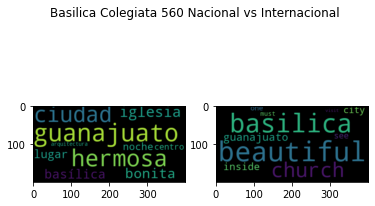

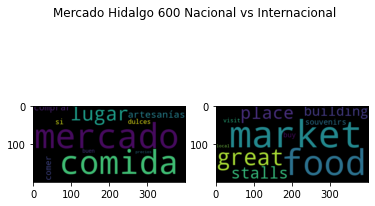

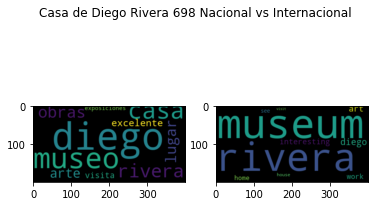

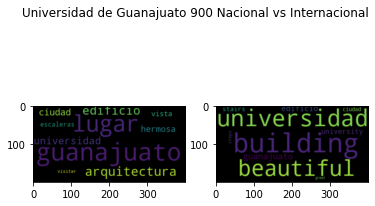

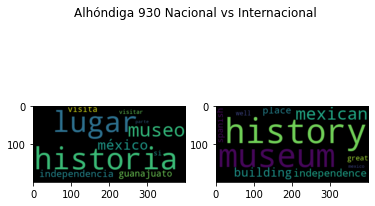

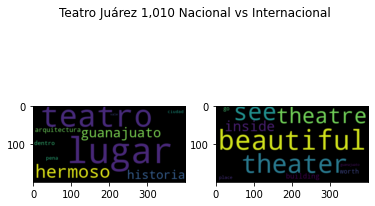

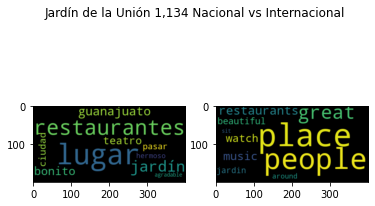

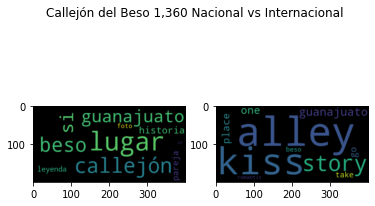

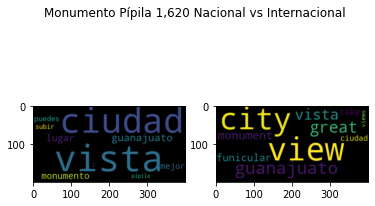

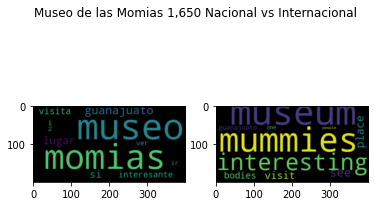

In [109]:
show_comparation_wc(dfs, words_nacional, words_internacional, tittle = 'Nacional vs Internacional')

## (e) Jovénes (elige un rango de edad interesante con base en sus estadísticas)

In [110]:
# Promedio de edades
mean_ages = []
for i, name in enumerate(dfs.keys()) :
  prom, sd = scores(dfs[name], column = 'Edad')

  mean_ages.append(prom)

In [111]:
words_jovenes = []
for i, place in enumerate(dfs.keys()) :
  print('-' * 80)
  print(place)
  tr_txt, _ = get_opinions_by_ages(dfs[place], age = mean_ages[i], older = False)
  print('-' * 80)
  words_jovenes.append(top_topics_lsa(tr_txt, topics = 3))

--------------------------------------------------------------------------------
Basilica Colegiata 560
276 opiniones encontradas.
--------------------------------------------------------------------------------


topic_1   topic_2   topic_3  abs_topic_1  abs_topic_2  abs_topic_3
guanajuato  0.287223  0.169568  0.095804     0.287223     0.169568     0.095804
iglesia     0.282317 -0.066728 -0.379164     0.282317     0.066728     0.379164
hermosa     0.263413 -0.061300 -0.144663     0.263413     0.061300     0.144663
ciudad      0.235211 -0.046511  0.045180     0.235211     0.046511     0.045180
basílica    0.207391 -0.025983  0.093587     0.207391     0.025983     0.093587
noche       0.206581 -0.053252 -0.055510     0.206581     0.053252     0.055510
lugar       0.200846 -0.030925  0.507593     0.200846     0.030925     0.507593
bonita      0.199800 -0.049098 -0.327250     0.199800     0.049098     0.327250
centro      0.179429 -0.027625  0.083306     0.179429     0.027625     0.083306
dentro      0.178352 -0.041792 -0.170329     0.178352     0.041792     0.170329

--------------------------------------------------------------------------------
Mercado Hidalgo 600
292 opiniones encontradas.
--------------------------------------------------------------------------------


topic_1   topic_2   topic_3  abs_topic_1  abs_topic_2  abs_topic_3
mercado     0.357411 -0.017468  0.388317     0.357411     0.017468     0.388317
comida      0.267454 -0.046747 -0.153607     0.267454     0.046747     0.153607
lugar       0.226747 -0.039670 -0.053816     0.226747     0.039670     0.053816
comprar     0.187941 -0.033797 -0.082038     0.187941     0.033797     0.082038
si          0.185239 -0.029471 -0.275788     0.185239     0.029471     0.275788
artesanías  0.185208 -0.036067 -0.035397     0.185208     0.036067     0.035397
comer       0.173379 -0.033644 -0.192135     0.173379     0.033644     0.192135
dulces      0.144417 -0.023534  0.025453     0.144417     0.023534     0.025453
buen        0.142116 -0.026919 -0.119173     0.142116     0.026919     0.119173
guanajuato  0.138048  0.027046 -0.018555     0.138048     0.027046     0.018555

--------------------------------------------------------------------------------
Casa de Diego Rivera 698
361 opiniones encontradas.
--------------------------------------------------------------------------------


topic_1   topic_2  ...  abs_topic_2  abs_topic_3
diego        0.316345  0.021171  ...     0.021171     0.030078
rivera       0.294076  0.043150  ...     0.043150     0.038908
casa         0.258481 -0.176517  ...     0.176517     0.122718
museo        0.214662 -0.148064  ...     0.148064     0.081035
obras        0.210009 -0.150231  ...     0.150231     0.137779
museum       0.153484  0.273754  ...     0.273754     0.012225
lugar        0.140615 -0.096724  ...     0.096724     0.092404
arte         0.134116 -0.097866  ...     0.097866     0.305604
art          0.133953  0.249788  ...     0.249788     0.037067
interesante  0.123388 -0.093898  ...     0.093898     0.158709

[10 rows x 6 columns]

--------------------------------------------------------------------------------
Universidad de Guanajuato 900
470 opiniones encontradas.
--------------------------------------------------------------------------------


topic_1   topic_2  ...  abs_topic_2  abs_topic_3
guanajuato     0.272761  0.139256  ...     0.139256     0.062435
universidad    0.261636  0.010933  ...     0.010933     0.130790
lugar          0.254626  0.005433  ...     0.005433     0.479814
arquitectura   0.249426 -0.015690  ...     0.015690     0.256829
edificio       0.242351 -0.015820  ...     0.015820     0.478301
ciudad         0.223487 -0.029359  ...     0.029359     0.156812
hermosa        0.204778 -0.034399  ...     0.034399     0.053161
vista          0.177067 -0.036195  ...     0.036195     0.004678
impresionante  0.165875  0.000891  ...     0.000891     0.066018
escaleras      0.141945 -0.019492  ...     0.019492     0.002248

[10 rows x 6 columns]

--------------------------------------------------------------------------------
Alhóndiga 930
497 opiniones encontradas.
--------------------------------------------------------------------------------


topic_1   topic_2  ...  abs_topic_2  abs_topic_3
historia       0.397651 -0.023899  ...     0.023899     0.047235
lugar          0.383869 -0.027460  ...     0.027460     0.586547
museo          0.262291 -0.016462  ...     0.016462     0.459510
méxico         0.207526 -0.008486  ...     0.008486     0.129070
guanajuato     0.182747  0.085470  ...     0.085470     0.007800
independencia  0.170921 -0.006031  ...     0.006031     0.199313
visita         0.147568 -0.006228  ...     0.006228     0.011074
si             0.142543 -0.006575  ...     0.006575     0.006750
interesante    0.135370 -0.006933  ...     0.006933     0.076431
visitar        0.125518 -0.003917  ...     0.003917     0.165711

[10 rows x 6 columns]

--------------------------------------------------------------------------------
Teatro Juárez 1,010
516 opiniones encontradas.
--------------------------------------------------------------------------------


topic_1   topic_2  ...  abs_topic_2  abs_topic_3
teatro        0.343798  0.017504  ...     0.017504     0.166233
lugar         0.314616 -0.037966  ...     0.037966     0.525441
hermoso       0.306449 -0.040340  ...     0.040340     0.132621
guanajuato    0.199489  0.090282  ...     0.090282     0.216031
arquitectura  0.181083 -0.020390  ...     0.020390     0.136229
historia      0.166050 -0.019928  ...     0.019928     0.102100
dentro        0.161907 -0.023824  ...     0.023824     0.174427
ciudad        0.157325 -0.013865  ...     0.013865     0.003654
pena          0.135530 -0.019575  ...     0.019575     0.299425
vale          0.129873 -0.019390  ...     0.019390     0.290093

[10 rows x 6 columns]

--------------------------------------------------------------------------------
Jardín de la Unión 1,134
520 opiniones encontradas.
--------------------------------------------------------------------------------


topic_1   topic_2  ...  abs_topic_2  abs_topic_3
lugar         0.346951 -0.072619  ...     0.072619     0.247489
restaurantes  0.237652 -0.035856  ...     0.035856     0.081493
jardín        0.201904 -0.004491  ...     0.004491     0.189933
guanajuato    0.194544  0.054388  ...     0.054388     0.060535
bonito        0.172438 -0.030480  ...     0.030480     0.065301
teatro        0.167881  0.029706  ...     0.029706     0.208089
ciudad        0.154883 -0.016368  ...     0.016368     0.270599
hermoso       0.141604 -0.018206  ...     0.018206     0.068535
disfrutar     0.140550 -0.031612  ...     0.031612     0.221376
ambiente      0.128489 -0.024665  ...     0.024665     0.092093

[10 rows x 6 columns]

--------------------------------------------------------------------------------
Callejón del Beso 1,360
690 opiniones encontradas.
--------------------------------------------------------------------------------


topic_1   topic_2   topic_3  abs_topic_1  abs_topic_2  abs_topic_3
lugar       0.303311 -0.037667 -0.484736     0.303311     0.037667     0.484736
callejón    0.274913  0.002634  0.262056     0.274913     0.002634     0.262056
beso        0.243987  0.044591  0.261712     0.243987     0.044591     0.261712
si          0.221686 -0.013167  0.083346     0.221686     0.013167     0.083346
historia    0.214726 -0.024059 -0.333103     0.214726     0.024059     0.333103
pareja      0.201396 -0.022092  0.067203     0.201396     0.022092     0.067203
guanajuato  0.191953  0.120024  0.077606     0.191953     0.120024     0.077606
foto        0.189724 -0.023235  0.057573     0.189724     0.023235     0.057573
leyenda     0.178463 -0.013151  0.107709     0.178463     0.013151     0.107709
ir          0.165529 -0.011068  0.117748     0.165529     0.011068     0.117748

--------------------------------------------------------------------------------
Monumento Pípila 1,620
870 opiniones encontradas.
--------------------------------------------------------------------------------


topic_1   topic_2   topic_3  abs_topic_1  abs_topic_2  abs_topic_3
vista       0.419452 -0.046056  0.100608     0.419452     0.046056     0.100608
ciudad      0.329165 -0.045392  0.069800     0.329165     0.045392     0.069800
guanajuato  0.246995  0.108599  0.167526     0.246995     0.108599     0.167526
monumento   0.205173 -0.021550 -0.066439     0.205173     0.021550     0.066439
lugar       0.196032 -0.026541  0.377989     0.196032     0.026541     0.377989
puedes      0.168635 -0.018452 -0.168863     0.168635     0.018452     0.168863
subir       0.167372 -0.017607 -0.370265     0.167372     0.017607     0.370265
mejor       0.164436 -0.016585 -0.148838     0.164436     0.016585     0.148838
hermosa     0.148370 -0.014680  0.143844     0.148370     0.014680     0.143844
si          0.141087 -0.017804 -0.082996     0.141087     0.017804     0.082996

--------------------------------------------------------------------------------
Museo de las Momias 1,650
823 opiniones encontradas.
--------------------------------------------------------------------------------


topic_1   topic_2  ...  abs_topic_2  abs_topic_3
museo        0.325695 -0.020592  ...     0.020592     0.140803
momias       0.324601 -0.013297  ...     0.013297     0.016457
guanajuato   0.240036  0.087529  ...     0.087529     0.226811
lugar        0.214270 -0.020252  ...     0.020252     0.368967
interesante  0.207854 -0.021722  ...     0.021722     0.289615
si           0.200184 -0.014944  ...     0.014944     0.176733
visita       0.187869 -0.011972  ...     0.011972     0.414537
ver          0.152948 -0.013044  ...     0.013044     0.084029
bien         0.139016 -0.015152  ...     0.015152     0.158735
historia     0.134097 -0.011929  ...     0.011929     0.076604

[10 rows x 6 columns]

## (f) Mayores (elige un rango de edad interesante con base en sus estadísticas)


In [112]:
words_mayores = []
for i, place in enumerate(dfs.keys()) :
  print('-' * 80)
  print(place)
  tr_txt, _ = get_opinions_by_ages(dfs[place], age = mean_ages[i], older = True)
  print('-' * 80)
  words_mayores.append(top_topics_lsa(tr_txt, topics = 3))

--------------------------------------------------------------------------------
Basilica Colegiata 560
233 opiniones encontradas.
--------------------------------------------------------------------------------


topic_1   topic_2   topic_3  abs_topic_1  abs_topic_2  abs_topic_3
beautiful   0.381899 -0.229001 -0.038617     0.381899     0.229001     0.038617
guanajuato  0.257845  0.093808 -0.034328     0.257845     0.093808     0.034328
church      0.256341 -0.153103  0.098385     0.256341     0.153103     0.098385
basilica    0.247382 -0.127286 -0.060173     0.247382     0.127286     0.060173
inside      0.180252 -0.109597  0.018192     0.180252     0.109597     0.018192
see         0.177331 -0.103889 -0.024566     0.177331     0.103889     0.024566
city        0.153051 -0.084387  0.017975     0.153051     0.084387     0.017975
ciudad      0.142646  0.297904 -0.133379     0.142646     0.297904     0.133379
one         0.139692 -0.081134 -0.032200     0.139692     0.081134     0.032200
iglesia     0.135656  0.279184 -0.277405     0.135656     0.279184     0.277405

--------------------------------------------------------------------------------
Mercado Hidalgo 600
227 opiniones encontradas.
--------------------------------------------------------------------------------


topic_1   topic_2   topic_3  abs_topic_1  abs_topic_2  abs_topic_3
market     0.362760 -0.146105  0.065925     0.362760     0.146105     0.065925
food       0.227328 -0.084043  0.021338     0.227328     0.084043     0.021338
mercado    0.187531  0.378466 -0.450831     0.187531     0.378466     0.450831
great      0.186226 -0.063900  0.058162     0.186226     0.063900     0.058162
souvenirs  0.152363 -0.017664  0.068655     0.152363     0.017664     0.068655
place      0.150233 -0.058659 -0.028214     0.150233     0.058659     0.028214
building   0.139957 -0.058364 -0.041920     0.139957     0.058364     0.041920
visit      0.128932 -0.044573  0.008011     0.128932     0.044573     0.008011
stalls     0.124951 -0.050629  0.017584     0.124951     0.050629     0.017584
local      0.120777  0.001582 -0.022002     0.120777     0.001582     0.022002

--------------------------------------------------------------------------------
Casa de Diego Rivera 698
294 opiniones encontradas.
--------------------------------------------------------------------------------


topic_1   topic_2  ...  abs_topic_2  abs_topic_3
museum       0.285007 -0.090281  ...     0.090281     0.180302
rivera       0.281446  0.167539  ...     0.167539     0.013625
diego        0.271923  0.205529  ...     0.205529     0.037775
art          0.212558 -0.070225  ...     0.070225     0.516933
interesting  0.197315 -0.062110  ...     0.062110     0.056358
work         0.188397 -0.056372  ...     0.056372     0.002785
see          0.178965 -0.055758  ...     0.055758     0.196685
home         0.178395 -0.046319  ...     0.046319     0.092205
house        0.163444 -0.043423  ...     0.043423     0.024618
visit        0.147112 -0.045677  ...     0.045677     0.186678

[10 rows x 6 columns]

--------------------------------------------------------------------------------
Universidad de Guanajuato 900
361 opiniones encontradas.
--------------------------------------------------------------------------------


topic_1   topic_2  ...  abs_topic_2  abs_topic_3
universidad   0.321329 -0.024030  ...     0.024030     0.188132
edificio      0.289707 -0.036807  ...     0.036807     0.319244
guanajuato    0.288259  0.095272  ...     0.095272     0.132565
ciudad        0.234293 -0.018623  ...     0.018623     0.165319
arquitectura  0.214736 -0.015666  ...     0.015666     0.295989
lugar         0.183423 -0.013159  ...     0.013159     0.497945
vista         0.169521 -0.018877  ...     0.018877     0.035197
hermosa       0.167800 -0.017470  ...     0.017470     0.088783
escaleras     0.163389 -0.017978  ...     0.017978     0.023652
gran          0.149271 -0.012712  ...     0.012712     0.004047

[10 rows x 6 columns]

--------------------------------------------------------------------------------
Alhóndiga 930
413 opiniones encontradas.
--------------------------------------------------------------------------------


topic_1   topic_2  ...  abs_topic_2  abs_topic_3
historia       0.414074 -0.055571  ...     0.055571     0.245107
lugar          0.343333 -0.049491  ...     0.049491     0.353915
méxico         0.257751 -0.031747  ...     0.031747     0.157047
museo          0.228665 -0.024525  ...     0.024525     0.260559
independencia  0.219193 -0.022093  ...     0.022093     0.068441
guanajuato     0.173618  0.065995  ...     0.065995     0.084008
visitar        0.158469 -0.020764  ...     0.020764     0.133741
bien           0.143205 -0.021593  ...     0.021593     0.068232
visita         0.132187 -0.011654  ...     0.011654     0.336230
histórico      0.131975 -0.015017  ...     0.015017     0.122658

[10 rows x 6 columns]

--------------------------------------------------------------------------------
Teatro Juárez 1,010
463 opiniones encontradas.
--------------------------------------------------------------------------------


topic_1   topic_2  ...  abs_topic_2  abs_topic_3
teatro        0.343453 -0.021274  ...     0.021274     0.231206
lugar         0.312958 -0.053515  ...     0.053515     0.682701
hermoso       0.247664 -0.033664  ...     0.033664     0.011288
guanajuato    0.210858  0.066472  ...     0.066472     0.066106
arquitectura  0.189289 -0.025753  ...     0.025753     0.016109
historia      0.175164 -0.027205  ...     0.027205     0.205874
pena          0.164269 -0.023504  ...     0.023504     0.195657
vale          0.153383 -0.022433  ...     0.022433     0.174511
bonito        0.149535 -0.021479  ...     0.021479     0.066121
visitar       0.140861 -0.018821  ...     0.018821     0.030914

[10 rows x 6 columns]

--------------------------------------------------------------------------------
Jardín de la Unión 1,134
369 opiniones encontradas.
--------------------------------------------------------------------------------


topic_1   topic_2  ...  abs_topic_2  abs_topic_3
place        0.274468 -0.078110  ...     0.078110     0.079111
people       0.243877 -0.070098  ...     0.070098     0.001779
restaurants  0.207846 -0.057222  ...     0.057222     0.042807
great        0.187969 -0.052934  ...     0.052934     0.032919
jardin       0.178200 -0.012149  ...     0.012149     0.099329
plaza        0.173879  0.081085  ...     0.081085     0.426514
music        0.145457 -0.040938  ...     0.040938     0.008235
one          0.143909 -0.045157  ...     0.045157     0.078874
watch        0.141441 -0.040297  ...     0.040297     0.029774
beautiful    0.140234 -0.045131  ...     0.045131     0.125116

[10 rows x 6 columns]

--------------------------------------------------------------------------------
Callejón del Beso 1,360
622 opiniones encontradas.
--------------------------------------------------------------------------------


topic_1   topic_2   topic_3  abs_topic_1  abs_topic_2  abs_topic_3
lugar       0.310544 -0.031787  0.157320     0.310544     0.031787     0.157320
beso        0.274277  0.020087 -0.291896     0.274277     0.020087     0.291896
callejón    0.267982 -0.016814 -0.076291     0.267982     0.016814     0.076291
si          0.231996 -0.024777 -0.016975     0.231996     0.024777     0.016975
guanajuato  0.221906  0.107314  0.235964     0.221906     0.107314     0.235964
historia    0.206680 -0.022672 -0.103734     0.206680     0.022672     0.103734
leyenda     0.206146 -0.024255 -0.144002     0.206146     0.024255     0.144002
pareja      0.190471 -0.020233 -0.085379     0.190471     0.020233     0.085379
visita      0.157002 -0.007965  0.308652     0.157002     0.007965     0.308652
vas         0.147822 -0.015445  0.017305     0.147822     0.015445     0.017305

--------------------------------------------------------------------------------
Monumento Pípila 1,620
713 opiniones encontradas.
--------------------------------------------------------------------------------


topic_1   topic_2   topic_3  abs_topic_1  abs_topic_2  abs_topic_3
vista       0.418808 -0.080587 -0.038215     0.418808     0.080587     0.038215
ciudad      0.359343 -0.075322 -0.147561     0.359343     0.075322     0.147561
guanajuato  0.265468  0.074324 -0.067784     0.265468     0.074324     0.067784
lugar       0.208422 -0.043699 -0.338746     0.208422     0.043699     0.338746
monumento   0.204458 -0.033405 -0.033885     0.204458     0.033405     0.033885
mejor       0.166207 -0.029277 -0.025771     0.166207     0.029277     0.025771
pípila      0.153120 -0.028492 -0.029673     0.153120     0.028492     0.029673
subir       0.145517 -0.025504  0.360098     0.145517     0.025504     0.360098
hermosa     0.140254 -0.028501 -0.073306     0.140254     0.028501     0.073306
puedes      0.133460 -0.024724 -0.065249     0.133460     0.024724     0.065249

--------------------------------------------------------------------------------
Museo de las Momias 1,650
737 opiniones encontradas.
--------------------------------------------------------------------------------


topic_1   topic_2  ...  abs_topic_2  abs_topic_3
museo        0.324165 -0.065638  ...     0.065638     0.075452
momias       0.322900 -0.052549  ...     0.052549     0.118537
guanajuato   0.237580  0.053404  ...     0.053404     0.175404
visita       0.201454 -0.044144  ...     0.044144     0.404066
interesante  0.190958 -0.044124  ...     0.044124     0.110492
lugar        0.186764 -0.043086  ...     0.043086     0.067496
si           0.181894 -0.042480  ...     0.042480     0.059538
ver          0.162914 -0.038303  ...     0.038303     0.128766
bien         0.143249 -0.034003  ...     0.034003     0.067402
cuerpos      0.137435 -0.030760  ...     0.030760     0.309802

[10 rows x 6 columns]

## Jóvenes vs Mayores WordCloud

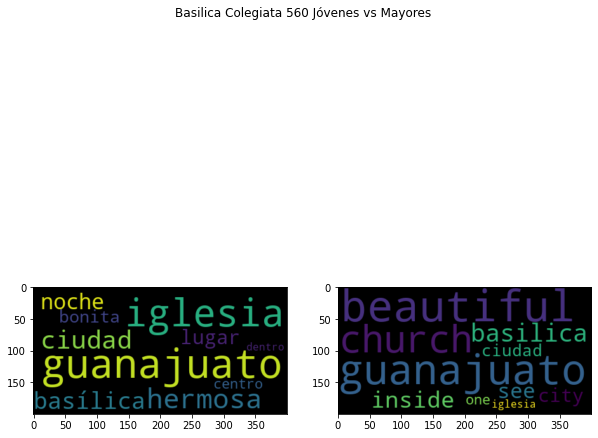

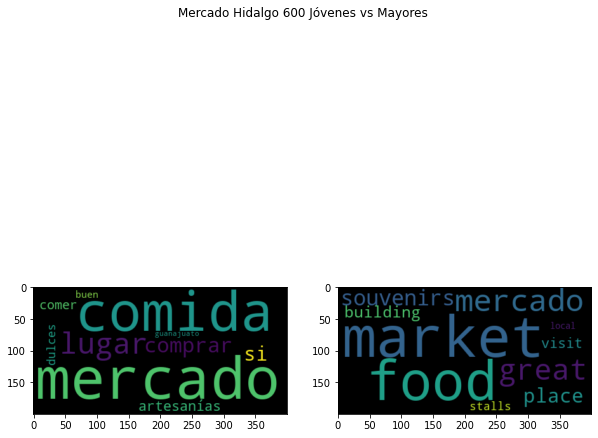

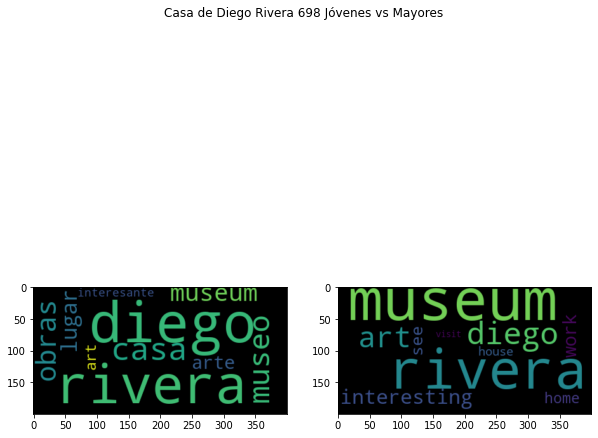

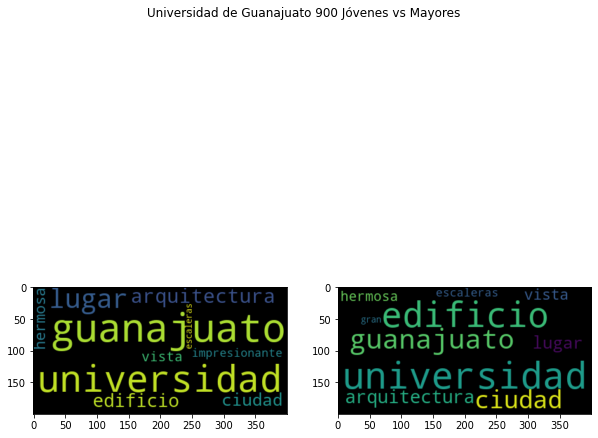

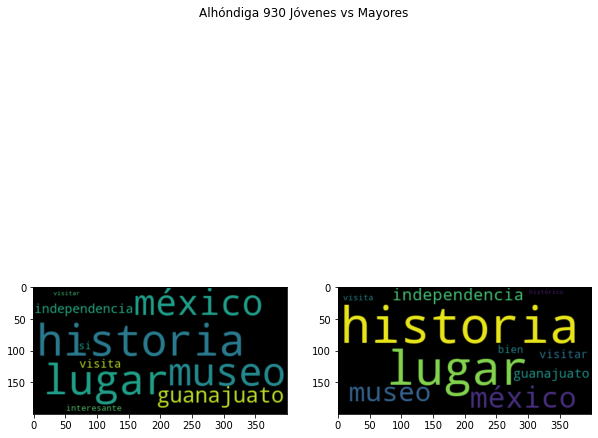

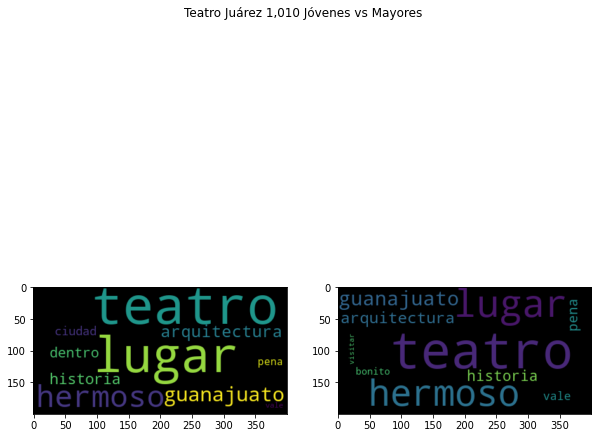

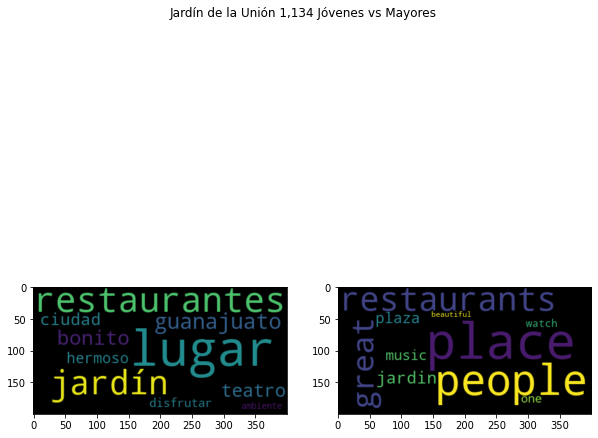

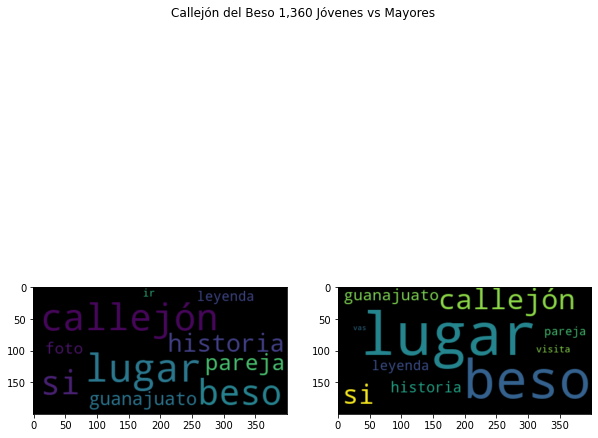

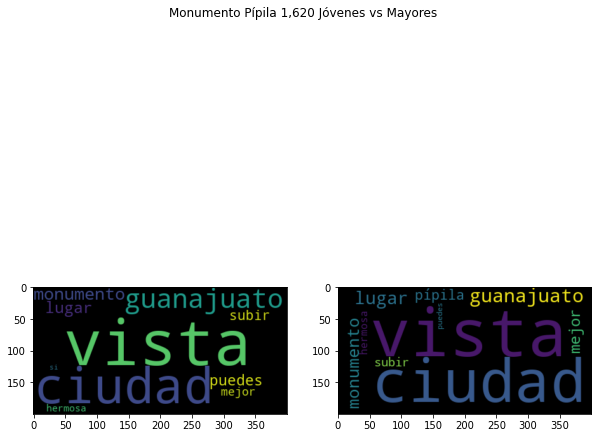

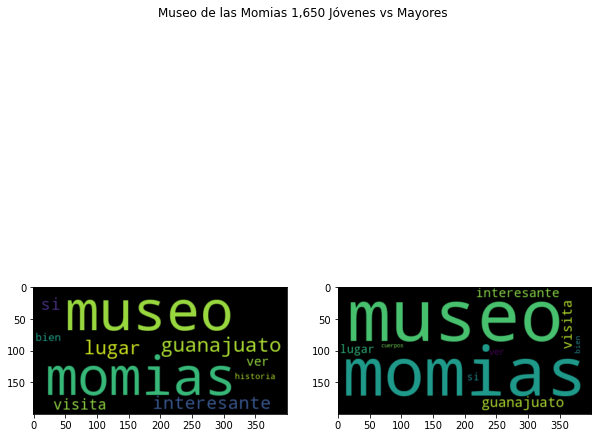

In [148]:
show_comparation_wc(dfs, words_jovenes, words_mayores, tittle = 'Jóvenes vs Mayores')

# Parte 4

Para cada uno de los $ 10 $ sitios turísticos, haga una nube de palabras que muestre las palabras más asociadas a sus opiniones negativas utilizando $ \chi^2 (ci, pi) $. Puede usar funciones de sklearn o hacerlo tal como en las diapositivas del autor Ricardo Baeza (diapositivas dónde está lo de información mutua).

In [74]:
def get_ranking_opinions(table, ranking = {1,2}) :
  # Obtengo rankings
  scale    = table['Escala']
  tittles  = [table['Título de la opinión'][i] for i, scale_ in enumerate(scale) if scale_ in ranking]
  opinions = [table['Opinión'][i] for i, scale_ in enumerate(scale) if scale_ in ranking]
  tr_y     = [scale_ for scale_ in scale if scale_ in ranking]
  
  print(len(opinions), 'opiniones negativas encontradas.')

  tr_txt          = [] # strings limpios
  corpus_palabras = [] # Para frecuencias
  for pair in zip(tittles, opinions) :
    # Concateno título y opinión
    full_opinion = pair[0][1:-1] + ' ' + pair[1][1:-1]
    # tokenizo con TweetTokenizer
    full_opinion = tk.tokenize(full_opinion.lower())
    # Elimino contenido basura
    clean_opinion = []
    for word in full_opinion :
      value = not word.isnumeric()
      value = value and word.find('.') == -1
      value = value and word.find(',') == -1
      value = value and word.find('_') == -1
      value = value and word.find(':') == -1
      value = value and word.find('=') == -1
      if value :
        clean_opinion += [word]
    # Agrego a corpus de todas las palabras
    corpus_palabras += clean_opinion
    # Regreso a string
    full_opinion = ' '.join(clean_opinion)
    # agrego a lista principal
    tr_txt.append(full_opinion)
  # Creo diccionario de frecuencias

  return tr_txt, tr_y

---------------------------------------------
Basilica Colegiata 560
3 opiniones negativas encontradas.
---------------------------------------------


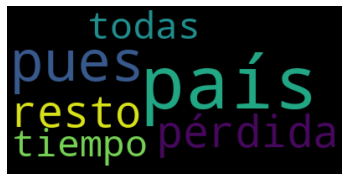

---------------------------------------------
Mercado Hidalgo 600
35 opiniones negativas encontradas.
---------------------------------------------


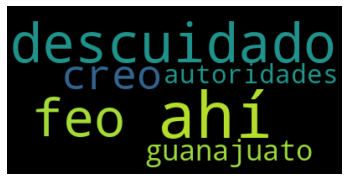

---------------------------------------------
Casa de Diego Rivera 698
16 opiniones negativas encontradas.
---------------------------------------------


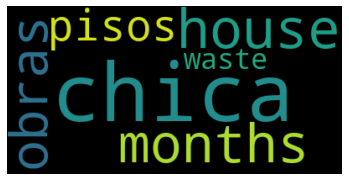

---------------------------------------------
Universidad de Guanajuato 900
4 opiniones negativas encontradas.
---------------------------------------------


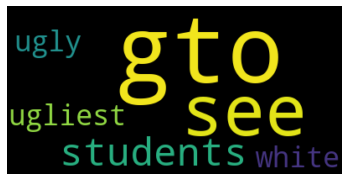

---------------------------------------------
Alhóndiga 930
18 opiniones negativas encontradas.
---------------------------------------------


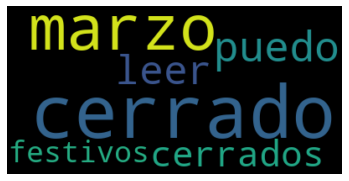

---------------------------------------------
Teatro Juárez 1,010
1 opiniones negativas encontradas.
*Extendiendo rango...*
28 opiniones negativas encontradas.
---------------------------------------------


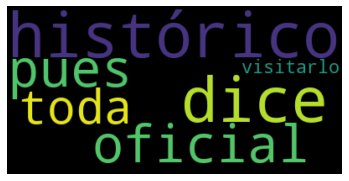

---------------------------------------------
Jardín de la Unión 1,134
5 opiniones negativas encontradas.
*Extendiendo rango...*
62 opiniones negativas encontradas.
---------------------------------------------


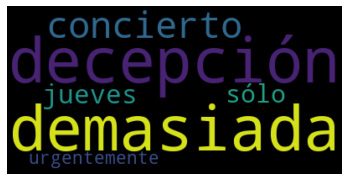

---------------------------------------------
Callejón del Beso 1,360
78 opiniones negativas encontradas.
---------------------------------------------


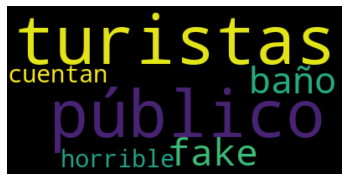

---------------------------------------------
Monumento Pípila 1,620
29 opiniones negativas encontradas.
---------------------------------------------


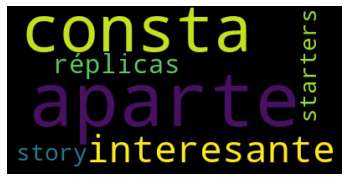

---------------------------------------------
Museo de las Momias 1,650
237 opiniones negativas encontradas.
---------------------------------------------


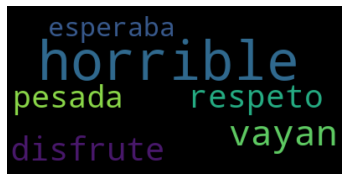

In [75]:
for place in dfs.keys() :
  print('-' * 45)
  print(place)

  tr_txt, tr_y = get_ranking_opinions(dfs[place], ranking = {1,2})
  # Agrego opiniones si existe solo una clase
  if len(set(tr_y)) == 1:
    print('*Extendiendo rango...*')
    tr_txt, tr_y = get_ranking_opinions(dfs[place], ranking = {1,2,3})
  print('-' * 45)

  # hago nube
  make_word_cloud(tr_txt, tr_y, k = 6)

# Parte 5

Para cada uno de los $ 10 $ sitios turísticos construya tres Bolsas de Palabras de la siguiente manera:

1.   1000 términos con mayor peso tfidf,
2.   2000 bigramas con mayor
tfidf, 
3.   1000 trigramas con mayor tfidf.

Luego concatene las tres representaciones
que fueron calculadas de forma independiente, con sus propios tfidfs según su espacio y su propio L2. Finalmente sobre todo ese espacio concatenado de $ 4000 $ características aplique ganancia de información o $\chi^2 $ y obtenga los $ 1000 $ features más relevantes.
Muestre una nube de palabras con el top 50 features relevantes para cada lugar turistico (10 nubes en total).

In [76]:
def get_tfidf(tr_txt, ngram_range = (1,1), max_features = None) :
  tfidf               = TfidfVectorizer(stop_words = stop_words, ngram_range = ngram_range, max_features = max_features)
  vectors             = tfidf.fit_transform(tr_txt)
  feature_names       = tfidf.get_feature_names()

  return vectors.todense(), feature_names

---------------------------------------------
Basilica Colegiata 560
560 opiniones encontradas.
---------------------------------------------


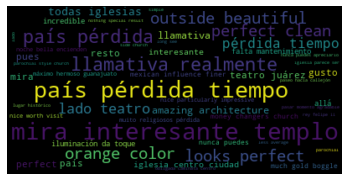

---------------------------------------------
Mercado Hidalgo 600
600 opiniones encontradas.
---------------------------------------------


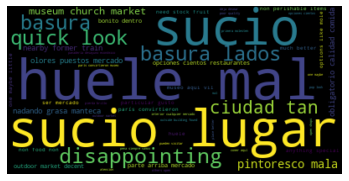

---------------------------------------------
Casa de Diego Rivera 698
698 opiniones encontradas.
---------------------------------------------


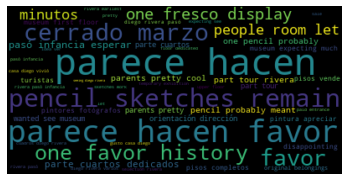

---------------------------------------------
Universidad de Guanajuato 900
900 opiniones encontradas.
---------------------------------------------


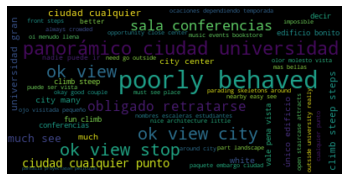

---------------------------------------------
Alhóndiga 930
930 opiniones encontradas.
---------------------------------------------


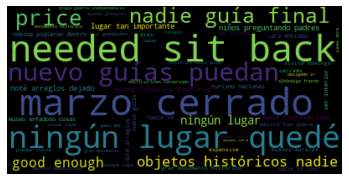

---------------------------------------------
Teatro Juárez 1,010
1010 opiniones encontradas.
---------------------------------------------


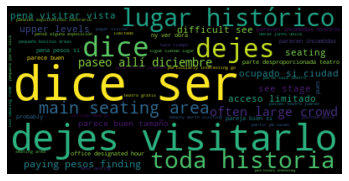

---------------------------------------------
Jardín de la Unión 1,134
1134 opiniones encontradas.
---------------------------------------------


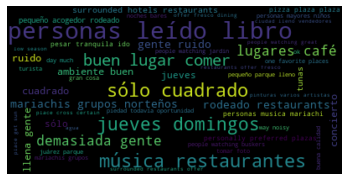

---------------------------------------------
Callejón del Beso 1,360
1360 opiniones encontradas.
---------------------------------------------


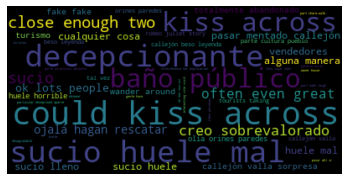

---------------------------------------------
Monumento Pípila 1,620
1620 opiniones encontradas.
---------------------------------------------


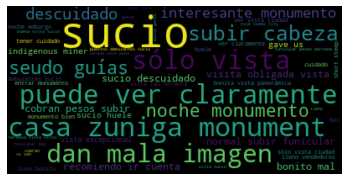

---------------------------------------------
Museo de las Momias 1,650
1650 opiniones encontradas.
---------------------------------------------


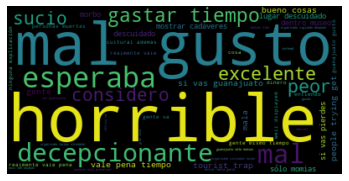

In [79]:
# Repito para cada lugar
for place in dfs.keys() :
  print('-' * 45)
  print(place)
  tr_txt, tr_y, _ = get_opinions_and_labels(dfs[place])
  print('-' * 45)

  full_matrix     = []
  full_names      = []

  '''# tfidf completo
  vectors, feature_names = get_tfidf(tr_txt)
  # Agrego a matrix principal
  full_matrix = vectors
  full_names += feature_names'''

  # 1000 términos con mayor peso tfidf
  vectors, feature_names = get_tfidf(tr_txt, max_features = 1000)
  # Agrego a matrix principal
  full_matrix = vectors
  full_names += feature_names

  # 2000 bigramas con mayor tfidf 
  vectors, feature_names = get_tfidf(tr_txt, ngram_range = (2,2), max_features = 2000)
  # Agrego a matrix principal
  full_matrix = np.concatenate((full_matrix, vectors), axis = 1)
  full_names += feature_names

  # 1000 trigramas con mayor tfidf
  vectors, feature_names = get_tfidf(tr_txt, ngram_range = (3,3), max_features = 1000)
  # Agrego a matrix principal
  full_matrix = np.concatenate((full_matrix, vectors), axis = 1)
  full_names += feature_names

  # Extraigo top k con chi2
  feats = SelectKBest(chi2, k = 1000)
  feats.fit(full_matrix, tr_y)
  best  = feats.get_support(indices = True)

  # Guardo solo cincuenta más relevante
  dict_best = dict()
  for index in best :
    # Guardo palabra-frecuencia
    dict_best[full_names[index]] = feats.scores_[index]

  # Ordeno con valores
  sorted_x = sorted(dict_best.items(), key = lambda item: item[1], reverse = True)

  # Creo diccionario de top 50
  dict_indices = dict()
  count = 0
  for word, value in sorted_x :
    dict_indices[word] = value
    count += 1
    if count == 50 :
      break

  wc = WordCloud()
  wc.generate_from_frequencies(dict_indices)
  plt.axis("off")
  plt.imshow(wc, interpolation = "bilinear")
  plt.show()

# Parte 6

Muestre la ocurrencia temporal de las $ 10 $ palabras con más ganancia de información de TODO el dataset para cada sitio turístico. Aquí se sugiere usar la gráfica de estilo de los discursos de primer año de los presidentes en USA dada como ejemplo en NLTK. La idea sería tener una gráfica por sitio turístico y la ocurrencia marcada en azul del top 10
palabras de con mayor ganancia de información o chi en todo el dataset.


Por ejemplo, si las 10 palabras con mayor ganancia de información en todo el dataset con respecto a las clases positivas, neutral y negativas son: $ w_1, \dots, w_{10} $ entonces haga una
gráfica de disperción temporal por lugar de como es la aparición de las palabras $ w_1, \dots, w_{10} $ en cada sitio turistico.

In [80]:
def sort_opinion_by_date(table) :
  tittles  = table['Título de la opinión']
  opinions = table['Opinión']
  dates    = table['Fecha']

  tr_txt          = [] # strings limpios
  for pair in zip(tittles, opinions) :
    # Concateno título y opinión
    full_opinion = pair[0][1:-1] + ' ' + pair[1][1:-1]
    # tokenizo con TweetTokenizer
    full_opinion = tk.tokenize(full_opinion.lower())
    # Elimino contenido basura
    clean_opinion = []
    for word in full_opinion :
      value = not word.isnumeric()
      value = value and word.find('.') == -1
      value = value and word.find(',') == -1
      value = value and word.find('_') == -1
      value = value and word.find(':') == -1
      value = value and word.find('=') == -1
      if value :
        clean_opinion += [word]
    # Regreso a string
    full_opinion = ' '.join(clean_opinion)
    # agrego a lista principal
    tr_txt.append(full_opinion)

  # Sort by dates
  dates_sorted = sorted([[tr_txt[i], date] for i, date in enumerate(table['Fecha'])], key = lambda item: item[1])

  tr_txt_sorted = []
  for text, date in dates_sorted :
    tr_txt_sorted.append(text)

  return tr_txt_sorted

In [81]:
# Obtengo texto y etiquetas de todo el dataset
full_text   = []
full_labels = []
for place in dfs.keys() :
  print('-' * 45)
  print(place)
  tr_txt, tr_y, _ = get_opinions_and_labels(dfs[place])

  full_text   += tr_txt
  full_labels += tr_y

---------------------------------------------
Basilica Colegiata 560
560 opiniones encontradas.
---------------------------------------------
Mercado Hidalgo 600
600 opiniones encontradas.
---------------------------------------------
Casa de Diego Rivera 698
698 opiniones encontradas.
---------------------------------------------
Universidad de Guanajuato 900
900 opiniones encontradas.
---------------------------------------------
Alhóndiga 930
930 opiniones encontradas.
---------------------------------------------
Teatro Juárez 1,010
1010 opiniones encontradas.
---------------------------------------------
Jardín de la Unión 1,134
1134 opiniones encontradas.
---------------------------------------------
Callejón del Beso 1,360
1360 opiniones encontradas.
---------------------------------------------
Monumento Pípila 1,620
1620 opiniones encontradas.
---------------------------------------------
Museo de las Momias 1,650
1650 opiniones encontradas.


In [85]:
len(full_text), len(full_labels)

(10462, 10462)

In [88]:
# Palabras más relevantes en todo el dataset
vectors, feature_names = get_tfidf(full_text)
# Extraigo top k con chi2
feats = SelectKBest(chi2, k = 10)
feats.fit(vectors, full_labels)
best  = feats.get_support(indices = True)

# Guardo nombres
top_k_words = []
for index in best :
  top_k_words.append(feature_names[index])

In [89]:
top_k_words

['cero',
 'decepcionante',
 'descuidado',
 'esperaba',
 'horrible',
 'huele',
 'mal',
 'momias',
 'peor',
 'sucio']

Basilica Colegiata 560


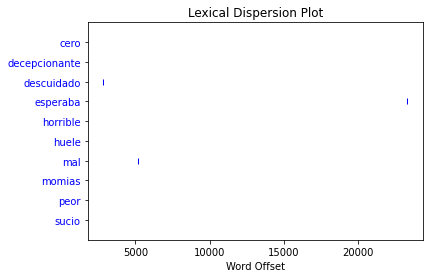

------------------------------------------------------------
Mercado Hidalgo 600


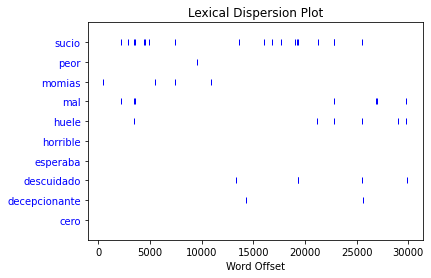

------------------------------------------------------------
Casa de Diego Rivera 698


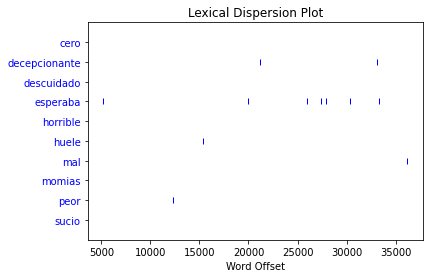

------------------------------------------------------------
Universidad de Guanajuato 900


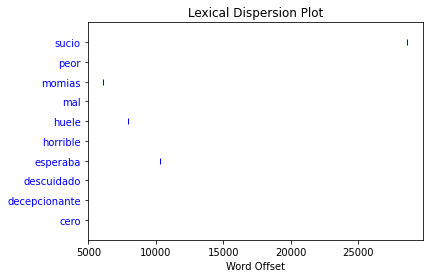

------------------------------------------------------------
Alhóndiga 930


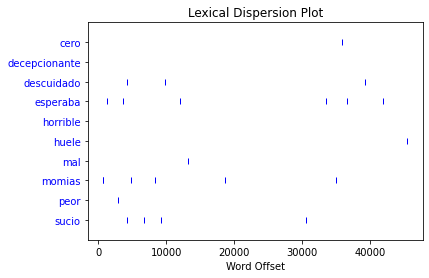

------------------------------------------------------------
Teatro Juárez 1,010


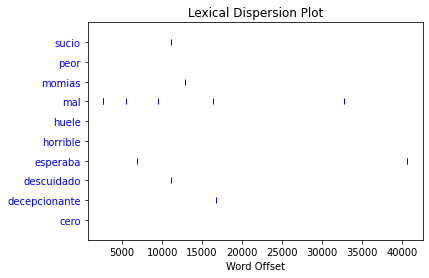

------------------------------------------------------------
Jardín de la Unión 1,134


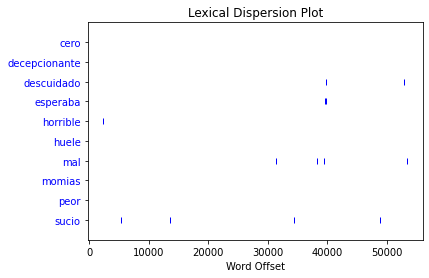

------------------------------------------------------------
Callejón del Beso 1,360


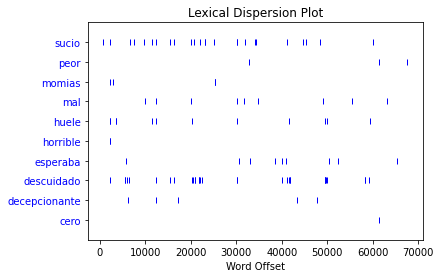

------------------------------------------------------------
Monumento Pípila 1,620


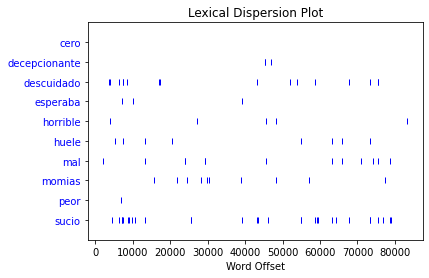

------------------------------------------------------------
Museo de las Momias 1,650


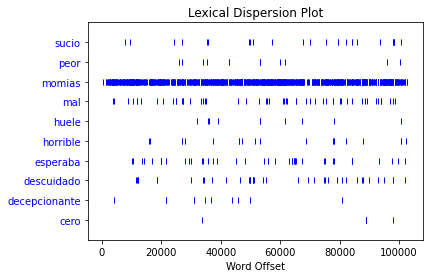

------------------------------------------------------------


In [92]:
for place in dfs.keys() :
  tr_txt = sort_opinion_by_date(dfs[place])

  tokens = tk.tokenize(" ".join(tr_txt))
  text   = nltk.Text(tokens)
  print(place)
  text.dispersion_plot(top_k_words)
  print('-' * 60)

# Parte 7

Diseñe una análisis temporal (formato libre) que muestre opiniones positivas, negativas y neutras a través de los meses y años para todos los sitios turísticos. En pocas palabras mostrar la evolución de las opiniones a través del tiempo.

------------------------------------------------
Basilica Colegiata 560


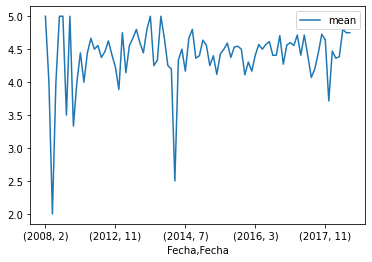

------------------------------------------------
Mercado Hidalgo 600


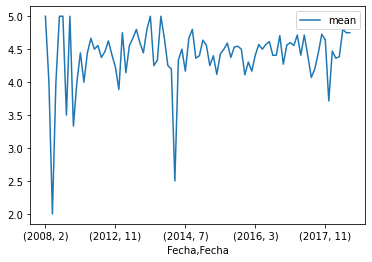

------------------------------------------------
Casa de Diego Rivera 698


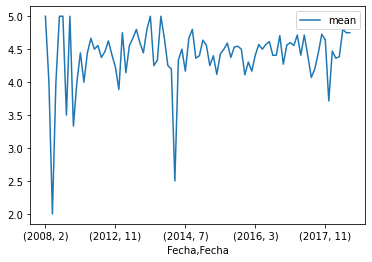

------------------------------------------------
Universidad de Guanajuato 900


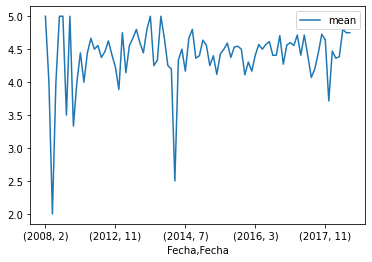

------------------------------------------------
Alhóndiga 930


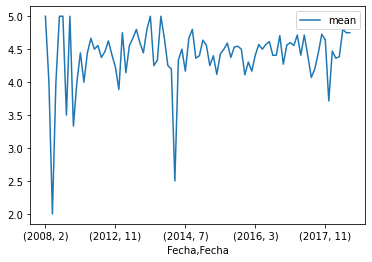

------------------------------------------------
Teatro Juárez 1,010


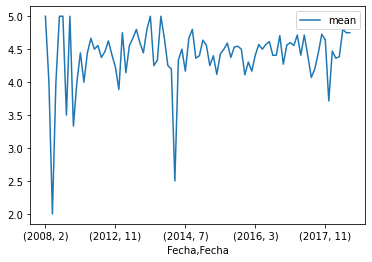

------------------------------------------------
Jardín de la Unión 1,134


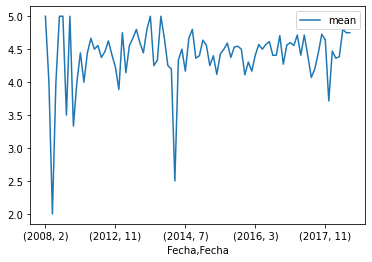

------------------------------------------------
Callejón del Beso 1,360


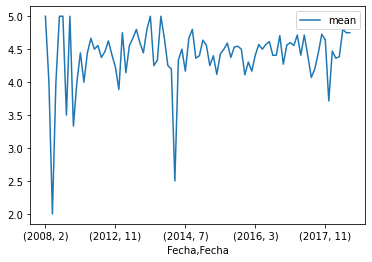

------------------------------------------------
Monumento Pípila 1,620


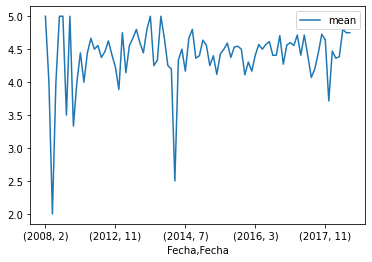

------------------------------------------------
Museo de las Momias 1,650


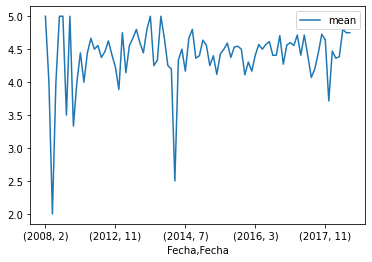

In [204]:
for place in dfs.keys() :
  print('-'* 48)
  print(place)
  subframe = dfs[place][['Fecha', 'Escala']]

  df_group_ = a.astype({'Fecha': 'datetime64[ns]'})
  df_group_date = df_group_.groupby([df_group_['Fecha'].dt.year, df_group_['Fecha'].dt.month])
  df_group_date.agg({'mean'}).loc[:,"Escala"].plot()
  plt.show()

# Preguntas

## 1. ¿De los sitios turísticos, cual diría usted que es el más polémico y la razón de ello?

El Museo de Momias. En primer lugar es el sitio que más opiniones tiene en del dataset. Luego, es el sitio con peor calificación promedio y desviación mayor. Esto quiere decir que las calificaciones están más dispersas que los demás lugares.

Además, es el lugar que tiene, en promedio, las longitudes de opinión más grandes. Los visitantes nacionales manifiestan que el lugar no es lo que esperaban y está sucio. Sin embargo, en los tres tópicos más relevantes para los visitantes internacionales aparece la palabra "interesante".

## 2. En cuanto al sitio más polémico, ¿Como es la diferencia de opinión y temas entre turistas nacionales e internacionales?

De nuevo, la cantidad de opiniones nacionales e internacionales es similar. Sin embargo, los nacionales opinan que el lugar está sucio y que están decepcionados. En contraste con los visitantes internacionales, que aunque hay quieres piensan que sí es decepcionante, hay otros que piensan que es interesante. 

## 3. ¿Cual diría que es el sitio que le gusta más a las mujeres y por qué?

In [142]:
scores_ = []
for place in dfs.keys() :
  _, tr_y = get_opinions_by_gender(dfs[place], gender = 'femenino')
  scores_.append([place, np.mean(tr_y)])

scores_ = np.array(scores_)
print(tabulate(scores_, headers = ['Nombre', 'Promedio', 'Desviación']))

243 opiniones encontradas de género femenino
272 opiniones encontradas de género femenino
349 opiniones encontradas de género femenino
416 opiniones encontradas de género femenino
417 opiniones encontradas de género femenino
456 opiniones encontradas de género femenino
510 opiniones encontradas de género femenino
682 opiniones encontradas de género femenino
743 opiniones encontradas de género femenino
779 opiniones encontradas de género femenino
Nombre                           Promedio
-----------------------------  ----------
Basilica Colegiata 560            4.58025
Mercado Hidalgo 600               4.01471
Casa de Diego Rivera 698          4.24642
Universidad de Guanajuato 900     4.63702
Alhóndiga 930                     4.44365
Teatro Juárez 1,010               4.73246
Jardín de la Unión 1,134          4.61961
Callejón del Beso 1,360           4.03812
Monumento Pípila 1,620            4.42665
Museo de las Momias 1,650         3.68549


In [143]:
scores_ = []
for place in dfs.keys() :
  # Obtengo array de edades
  gender = [word.lower() for word in dfs[place]['Género']]
  
  gender = [1 if gender_ == 'femenino' else 0 for gender_ in gender]
  scores_.append([place, sum(gender)/len(gender)])

scores_ = np.array(scores_)
print(tabulate(scores_, headers = ['Nombre', 'Promedio', 'Desviación']))

Nombre                           Promedio
-----------------------------  ----------
Basilica Colegiata 560           0.433929
Mercado Hidalgo 600              0.453333
Casa de Diego Rivera 698         0.5
Universidad de Guanajuato 900    0.462222
Alhóndiga 930                    0.448387
Teatro Juárez 1,010              0.451485
Jardín de la Unión 1,134         0.449735
Callejón del Beso 1,360          0.501471
Monumento Pípila 1,620           0.458642
Museo de las Momias 1,650        0.472121


Según las estadísticas, los lugares con mejor calificación para esta categoría son el Teatro Juárez, la Universidad de Guanajuato y el Jardín de la Unión. Por otro lado, de los lugares anteriores, los porcentajes de esta categoría quedan como: $45\%$ para el Teatro Juárez, $46\%$ para la Universidad de Guanajuato y $44\%$ para el Jardín de la Unión.

Finalmente, para las palabras más relevantes de estos tres lugares dada esta categoría, se observa que existe mayor relevancia en los tópicos para la Jardín de la Unión. De lo anterior, se concluye que el lugar preferido por las mujeres es la Jardín de la Unión.

## 4.  ¿Cual diría que es el sitio que le gusta más a las personas jóvenes y por qué?


In [ ]:
# Promedio de edades
mean_ages = []
for i, name in enumerate(dfs.keys()) :
  prom, sd = scores(dfs[name], column = 'Edad')
  
  mean_ages.append(prom)

In [147]:
scores_ = []
for i, place in enumerate(dfs.keys()) :
  _ , tr_y = get_opinions_by_ages(dfs[place], age = mean_ages[i], older = False)

  scores_.append([place, np.mean(tr_y)])

scores_ = np.array(scores_)

print(tabulate(scores_, headers = ['Nombre', 'Promedio', 'Desviación']))

276 opiniones encontradas.
292 opiniones encontradas.
361 opiniones encontradas.
470 opiniones encontradas.
497 opiniones encontradas.
516 opiniones encontradas.
520 opiniones encontradas.
690 opiniones encontradas.
870 opiniones encontradas.
823 opiniones encontradas.
Nombre                           Promedio
-----------------------------  ----------
Basilica Colegiata 560            4.49275
Mercado Hidalgo 600               3.96918
Casa de Diego Rivera 698          4.28532
Universidad de Guanajuato 900     4.62128
Alhóndiga 930                     4.4165
Teatro Juárez 1,010               4.70155
Jardín de la Unión 1,134          4.59231
Callejón del Beso 1,360           4.03478
Monumento Pípila 1,620            4.40805
Museo de las Momias 1,650         3.75699


In [150]:
scores_ = []
for i, place in enumerate(dfs.keys()) :
  _ , tr_y = get_opinions_by_ages(dfs[place], age = mean_ages[i], older = False)

  
  scores_.append([place, len(tr_y) / dfs[place]['Edad'].shape[0]])

scores_ = np.array(scores_)

print(tabulate(scores_, headers = ['Nombre', 'Promedio', 'Desviación']))

276 opiniones encontradas.
292 opiniones encontradas.
361 opiniones encontradas.
470 opiniones encontradas.
497 opiniones encontradas.
516 opiniones encontradas.
520 opiniones encontradas.
690 opiniones encontradas.
870 opiniones encontradas.
823 opiniones encontradas.
Nombre                           Promedio
-----------------------------  ----------
Basilica Colegiata 560           0.492857
Mercado Hidalgo 600              0.486667
Casa de Diego Rivera 698         0.517192
Universidad de Guanajuato 900    0.522222
Alhóndiga 930                    0.534409
Teatro Juárez 1,010              0.510891
Jardín de la Unión 1,134         0.458554
Callejón del Beso 1,360          0.507353
Monumento Pípila 1,620           0.537037
Museo de las Momias 1,650        0.498788


De acuerdo al criterio de medias de edad por lugar para categorizar como joven, las mejores calificaciones se obtivieron para la Teatro Juárez, Universidad de Guanajuato y el Jardín de la Unión. 

En cuanto al porcentaje de personas jóvenes, según el corte de media, se obtuvo: $51\%$ de personas jóvenes para el Teatro Juárez, $52\%$ para la Universidad de Guanajuato y $45\%$ para el Jardín de la Unión. 

De lo anterior y considerando los topics analizados en el punto concluímos en el lugar preferido por los Jóvenes es la Universidad de Guanajuato.

## 5. ¿Qué otras observaciones valiosas puede obtener de su análisis? (e.g., ¿identificó de que se queja la gente? ¿qué tipo de cosas le gustó a la gente?, etc.)

1. La mejor calificación general se obtuvo para el Teatro Juárez ($4.7$) y la peor calificación se obtuvo para el Museo de Momias ($3.7$).
2. El lugar con más reseñas es el museo de Momias y la cantidad de visitantes nacionales e internacionales registradas es casi igual respecto a frecuencias.
3. Los lugares en los que la frecuencia de visitantes por género está "equilibrada" son Casa Diego Rivera, Callejón del Beso y el Museo de Momias.
4. De acuerdo a la función $\chi^2$, las cosas de las que más se queja la gente son pérdida de tiempo para la Basilica Colegiata, descuido para el Mercado Hidalgo, que está cerrado para La Alhóldiga, descepción para el Jardín de la Unión y para lugares como el Callejón del Beso y el Museo de Momias, que el jugar es sucio y huele mal.
5. En las gráficas de dispersión se observó que para el callejón del Beso ha sido una constante que el sitio estpe descuidado. De igual manera, para el Mercado Hidalgo ha sido una constante lasuciedad y más recientemente el olor.
6. En contraste con el punto anterior, los lugares como la Basílica y el Teatro Juárez se consideran como lugares "hermosos" principalmente por su arquitectura y su valor histórico.